# 📘 Starter Code

This notebook is provided to help you get started with loading and exploring the dataset.     
You are **not required** to use this code, but you may find it useful as a reference.     
Because the `ERC20-stablecoins.zip` dataset is distributed as a large ZIP file, you may encounter difficulties downloading or extracting it locally due to storage or memory constraints. The code below demonstrates how to access and read the data directly from the ZIP file, without unzipping it on your computer.

## 📦 Importing Required Library
We begin by importing a few standard Python libraries that will be used to: 
* access ZIP files
* handle in-memory file objects
* load tabular data for analysis

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import zipfile
import io
import pandas as pd
import datetime
import numpy as np
from pandas import read_csv



## ⚠️ Before you run this notebook
Please make sure that:      
* The file **`ERC20-stablecoins.zip`** is located in the same directory as this notebook     
* You have sufficient memory available to load large CSV files in chunks if needed          

You do **not** need to manually unzip the file.     

## 📂 Explore the Contents of the ZIP File
The dataset is provided as a ZIP archive and contains multiple CSV files, including transaction data, price data, and event-level information.

In [5]:
print("Files in ERC20-stablecoins.zip:")
print("=" * 50)

with zipfile.ZipFile("ERC20-stablecoins.zip", "r") as outer_zip:
    for name in outer_zip.namelist():
        if name.endswith(".csv"):
            print(f"📄 {name}")
        elif name.endswith(".zip"):
            print(f"📦 {name}")
            nested_zip_data = outer_zip.read(name)
            with zipfile.ZipFile(io.BytesIO(nested_zip_data), "r") as inner_zip:
                for inner_name in inner_zip.namelist():
                    if inner_name.endswith(".csv"):
                        print(f"  📄 {inner_name}")

Files in ERC20-stablecoins.zip:
📄 token_transfers.csv
📄 token_transfers_V2.0.0.csv
📄 token_transfers_V3.0.0.csv
📦 price_data.zip
  📄 price_data/dai_price_data.csv
  📄 price_data/pax_price_data.csv
  📄 price_data/usdc_price_data.csv
  📄 price_data/usdt_price_data.csv
  📄 price_data/ustc_price_data.csv
  📄 price_data/wluna_price_data.csv
📄 event_data.csv


## 📄 Example: Opening a File from the ZIP Archive
To demonstrate how to work with the data, we begin by opening `token_transfers.csv` file as an example.    


The code below:
* displays all column names in the selected CSV file
* prints the first few rows as a preview of the data structure

In [6]:
with zipfile.ZipFile("ERC20-stablecoins.zip") as z:
    with z.open("token_transfers.csv") as f:
        # Read the first few rows
        sample = pd.read_csv(f, nrows=5)
        print(f"\n📋 All columns in token_transfers.csv:")
        print(sample.columns.tolist())
        print(f"\n📊 First 5 rows:")
        print(sample)


📋 All columns in token_transfers.csv:
['block_number', 'transaction_index', 'from_address', 'to_address', 'time_stamp', 'contract_address', 'value']

📊 First 5 rows:
   block_number  transaction_index  \
0      14669683                  7   
1      14669683                 45   
2      14669683                 46   
3      14669683                 47   
4      14669683                 48   

                                 from_address  \
0  0xd30b438df65f4f788563b2b3611bd6059bff4ad9   
1  0x4941834ed1428089ee76252f6f9d767e800499b0   
2  0x2c1f9a20711e14f8484a41123e20d1b06858ebea   
3  0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0   
4  0x66589b8278470d58d4112f3d065de0f75734312e   

                                   to_address  time_stamp  \
0  0xda816e2122a8a39b0926bfa84edd3d42477e9efd  1651105815   
1  0x28c6c06298d514db089934071355e5743bf21d60  1651105815   
2  0x28c6c06298d514db089934071355e5743bf21d60  1651105815   
3  0x3cd751e6b0078be393132286c442345e5dc49699  1651105815   
4  0

### 📊 Understanding the Transaction Data Columns
Each row in the transaction dataset represents one ERC-20 token transfer event. The columns have the following meanings:
* `block_number` and `transaction_index`      
  Used to order transactions chronologically on the blockchain.
* `from_address`        
  The address that sends the token.
* `to_address`          
  The address that receives the token.
* `time_stamp`         
  The time of the transaction, recorded as a Unix timestamp (seconds since January 1, 1970, UTC).
* `contract_address`      
  Identifies which stablecoin or cryptocurrency is being transferred.
* `value`      
  The size of the transfer, representing the amount of capital moved.

### 🔎 Working with Time Information
#### The `time_stamp` Column
The `time_stamp` variable is stored as a Unix timestamp, which is not easily interpretable in its raw numeric form.     
To make the time information more readable (e.g. calendar dates and times), you may convert it into a standard datetime format using the code provided below.      
This step is optional but strongly recommended for visualization and analysis.

In [7]:
# Example of converting Unix timestamp to readable date-time

unix_time = 1651105815     # this means 1651105815 seconds since January 1, 1970, UTC
date_time = pd.to_datetime(unix_time, unit="s", utc=True)

print(date_time)

2022-04-28 00:30:15+00:00


### 🪙 Identifying Stablecoins and Tokens
#### The `contract_address` Column
There are **six unique contract addresses** in this dataset. Each contract address corresponds to a specific stablecoin or cryptocurrency:   
1. `0x6b175474e89094c44da98b954eedeac495271d0f` : **DAI**
2. `0x8e870d67f660d95d5be530380d0ec0bd388289e1` : **PAX**
3. `0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48` : **USDC**
4. `0xdac17f958d2ee523a2206206994597c13d831ec7` : **USDT**
5. `0xa47c8bf37f92abed4a126bda807a7b7498661acd` : **USTC**
6. `0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9` : **WLUNA**


## 💰 Opening `price_data`
Opening `price_data` works a little bit differently since it is stored in a nested zip folder.

In [8]:
# Open outer zip
with zipfile.ZipFile("ERC20-stablecoins.zip") as outer_zip:
    nested_zip = outer_zip.read("price_data.zip")    
    # Open the nested zip
    with zipfile.ZipFile(io.BytesIO(nested_zip)) as inner_zip:
        # Open the CSV from the nested zip
        with inner_zip.open("price_data/dai_price_data.csv") as f:
            # Read the first few rows
            sample = pd.read_csv(f, nrows=5)
            print(f"\n📋 All columns in price_data/dai_price_data.csv:")
            print(sample.columns.tolist())
            print(f"\n📊 First 5 rows:")
            print(sample)


📋 All columns in price_data/dai_price_data.csv:
['timestamp', 'open', 'high', 'low', 'close']

📊 First 5 rows:
    timestamp    open  high     low   close
0  1648857600  0.9999     1  0.9989  1.0000
1  1648944000  1.0000     1  0.9989  0.9990
2  1649030400  0.9990     1  0.9989  0.9995
3  1649116800  0.9994     1  0.9987  0.9999
4  1649203200  0.9999     1  0.9988  0.9991


## 💬 Opening `event_data`
This file contains tweets related to stablecoin and the sentiment of the tweet.

In [9]:
with zipfile.ZipFile("ERC20-stablecoins.zip") as z:
    with z.open("event_data.csv") as f:
        sample = pd.read_csv(f, encoding='latin-1', nrows=5)
        print(f"\n📊 First 5 rows:")
        print(sample)


📊 First 5 rows:
                                               event   timestamp      type  \
0  BlackRock and Fidelity Back USDC in $400 Milli...  1649721600  positive   
1  Terra UST takes over BUSD to become third larg...  1650412800  positive   
2  LARGE amounts of UST selling on ANCHOR (approx...  1651881600  negative   
3  UST depegs LFG deploys assets to defend peg (7...  1651968000  negative   
4    UST Depegs again to 35 cents LUNA keeps falling  1652054400  negative   

  stablecoin  
0       usdc  
1       ustc  
2       ustc  
3       ustc  
4       ustc  


#  Transactional data



## file opening & basic cleaning

In [10]:
contract_mapping = {
    '0x6b175474e89094c44da98b954eedeac495271d0f': 'DAI',
    '0x8e870d67f660d95d5be530380d0ec0bd388289e1': 'PAX',
    '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': 'USDC',
    '0xdac17f958d2ee523a2206206994597c13d831ec7': 'USDT',
    '0xa47c8bf37f92abed4a126bda807a7b7498661acd': 'USTC',
    '0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9': 'WLUNA'
}

with zipfile.ZipFile("ERC20-stablecoins.zip") as z:
    with z.open("token_transfers.csv") as f:
        TT1 = pd.read_csv(f)
        #convert datetime
        TT1['datetime'] = pd.to_datetime(TT1['time_stamp'], unit='s')
        #change address to coin name
        TT1['coin_name'] = TT1['contract_address'].map(contract_mapping)
        TT1.drop(columns=['contract_address','time_stamp'], inplace=True)

    with z.open("token_transfers_V2.0.0.csv") as f:
        TT2 = pd.read_csv(f)
        #convert datetime
        TT2['datetime'] = pd.to_datetime(TT2['time_stamp'], unit='s')
        #change address to coin name
        TT2['coin_name'] = TT2['contract_address'].map(contract_mapping)
        TT2.drop(columns=['contract_address','time_stamp'], inplace=True)

    with z.open("token_transfers_V3.0.0.csv") as f:
        TT3 = pd.read_csv(f)
        #convert datetime
        TT3['datetime'] = pd.to_datetime(TT3['time_stamp'], unit='s')
        #change address to coin name
        TT3['coin_name'] = TT3['contract_address'].map(contract_mapping)
        TT3.drop(columns=['contract_address','time_stamp'], inplace=True)
print("Data transformation complete. Preview:")
print(TT1[['datetime', 'coin_name', 'value']].head())
print(TT2[['datetime', 'coin_name', 'value']].head())
print(TT3[['datetime', 'coin_name', 'value']].head())

Data transformation complete. Preview:
             datetime coin_name         value
0 2022-04-28 00:30:15      USDT     18.670000
1 2022-04-28 00:30:15      USDT  10000.000000
2 2022-04-28 00:30:15      USDT   9942.313005
3 2022-04-28 00:30:15      USDT    234.364097
4 2022-04-28 00:30:15      USDT   9800.000000
             datetime coin_name         value
0 2022-04-28 00:30:15      USDT     18.670000
1 2022-04-28 00:30:15      USDT  10000.000000
2 2022-04-28 00:30:15      USDT   9942.313005
3 2022-04-28 00:30:15      USDT    234.364097
4 2022-04-28 00:30:15      USDT   9800.000000
             datetime coin_name         value
0 2022-04-01 11:10:21      USDT    800.000000
1 2022-04-01 11:10:21      USDT    579.000000
2 2022-04-01 11:10:21      USDT  15898.000000
3 2022-04-01 11:10:21      USDT    200.929675
4 2022-04-01 11:10:24      USDT    651.675449


## Display dataframes

In [11]:
print(TT1[['datetime', 'coin_name', 'value']].tail())
print(TT2[['datetime', 'coin_name', 'value']].tail())
print(TT3[['datetime', 'coin_name', 'value']].tail())

                   datetime coin_name         value
5280126 2022-05-25 18:47:26     WLUNA  2.465969e+05
5280127 2022-05-25 18:47:26     WLUNA  8.606143e+05
5280128 2022-05-25 18:47:26     WLUNA  2.088362e+07
5280129 2022-05-25 18:47:44      USDT  7.570000e+02
5280130 2022-05-25 18:47:44      USDC  2.500000e+02
                    datetime coin_name        value
28674506 2022-10-07 02:38:47      USDC   853.630000
28674507 2022-10-07 02:38:47      USDC  3133.274260
28674508 2022-10-07 02:38:47       DAI  5020.200000
28674509 2022-10-07 02:38:47       DAI  3921.972387
28674510 2022-10-07 02:38:47       DAI  5598.273150
                    datetime coin_name         value
36723650 2022-11-01 04:53:59      USDC     10.283114
36723651 2022-11-01 04:53:59      USDC     79.504357
36723652 2022-11-01 04:53:59      USDC    254.098146
36723653 2022-11-01 04:53:59      USDC  15178.209720
36723654 2022-11-01 04:53:59       DAI     14.500000


## Data cleaning function

In [12]:
def clean_and_diagnose(df):
    print("--- 1. Checking for Null Values ---")
    null_counts = df.isnull().sum()
    print(null_counts[null_counts > 0] if null_counts.any() else "No missing values found.")

    print("\n--- 2. Checking for Duplicate Transactions ---")
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows found: {duplicates}")
    # Tip: In blockchain data, duplicates are rare but can happen if the scraper double-recorded a block.
    df = df.drop_duplicates()

    print("\n--- 3. Value Abnormalities (The 'Value' Column) ---")
    # Check for negative values (impossible in standard ERC20 transfers)
    neg_values = (df['value'] < 0).sum()
    # Check for zero values (often "Approval" events or contract interactions, not actual fund moves)
    zero_values = (df['value'] == 0).sum()

    print(f"Negative values: {neg_values}")
    print(f"Zero-value transfers: {zero_values}")
    df = df[df['value'] != 0]

    print("\n--- 4. Address Integrity ---")
    # Check if addresses are missing the '0x' prefix or are the wrong length
    invalid_from = df[~df['from_address'].str.startswith('0x', na=False)]
    invalid_to = df[~df['to_address'].str.startswith('0x', na=False)]
    print(f"Malformed 'from' addresses: {len(invalid_from)}")
    print(f"Malformed 'to' addresses: {len(invalid_to)}")

    return df


## data cleaning

In [3]:
TT1A = clean_and_diagnose(TT1)

NameError: name 'clean_and_diagnose' is not defined

In [14]:
TT2A = clean_and_diagnose(TT2)

--- 1. Checking for Null Values ---
No missing values found.

--- 2. Checking for Duplicate Transactions ---
Duplicate rows found: 10779

--- 3. Value Abnormalities (The 'Value' Column) ---
Negative values: 0
Zero-value transfers: 16728

--- 4. Address Integrity ---
Malformed 'from' addresses: 0
Malformed 'to' addresses: 0


In [15]:
TT3A = clean_and_diagnose(TT3)

--- 1. Checking for Null Values ---
No missing values found.

--- 2. Checking for Duplicate Transactions ---
Duplicate rows found: 12521

--- 3. Value Abnormalities (The 'Value' Column) ---
Negative values: 0
Zero-value transfers: 21757

--- 4. Address Integrity ---
Malformed 'from' addresses: 0
Malformed 'to' addresses: 0


## Merging cleaned dataframes

In [16]:
TTA = pd.concat([TT1A, TT2A, TT3A], ignore_index=True)

## cleaning the merged df to remove duplicates

In [2]:
TTAC = clean_and_diagnose(TTA)
TTAC.to_csv("Token_transfer_merged_cleaned.csv", index=False)
#8min run time

NameError: name 'clean_and_diagnose' is not defined

## Alternatively use sleaned csv file to load data

In [3]:
TTAC = pd.read_csv("data/Token_transfer_merged_cleaned.csv")

## Analysis of total value(amount) of a coin's transactions withn each hour/day over time

### daily ver

In [4]:
# 4. daily Aggregation
# We group by the datetime (rounded to the day) and the coin name
daily_df = TTAC.groupby([pd.Grouper(key='datetime', freq='D'), 'coin_name'])['value'].sum().reset_index()

# Rename columns for clarity
daily_df.rename(columns={'value': 'total_volume_transferred'}, inplace=True)
print(daily_df)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

#### Plot graph over all datetime

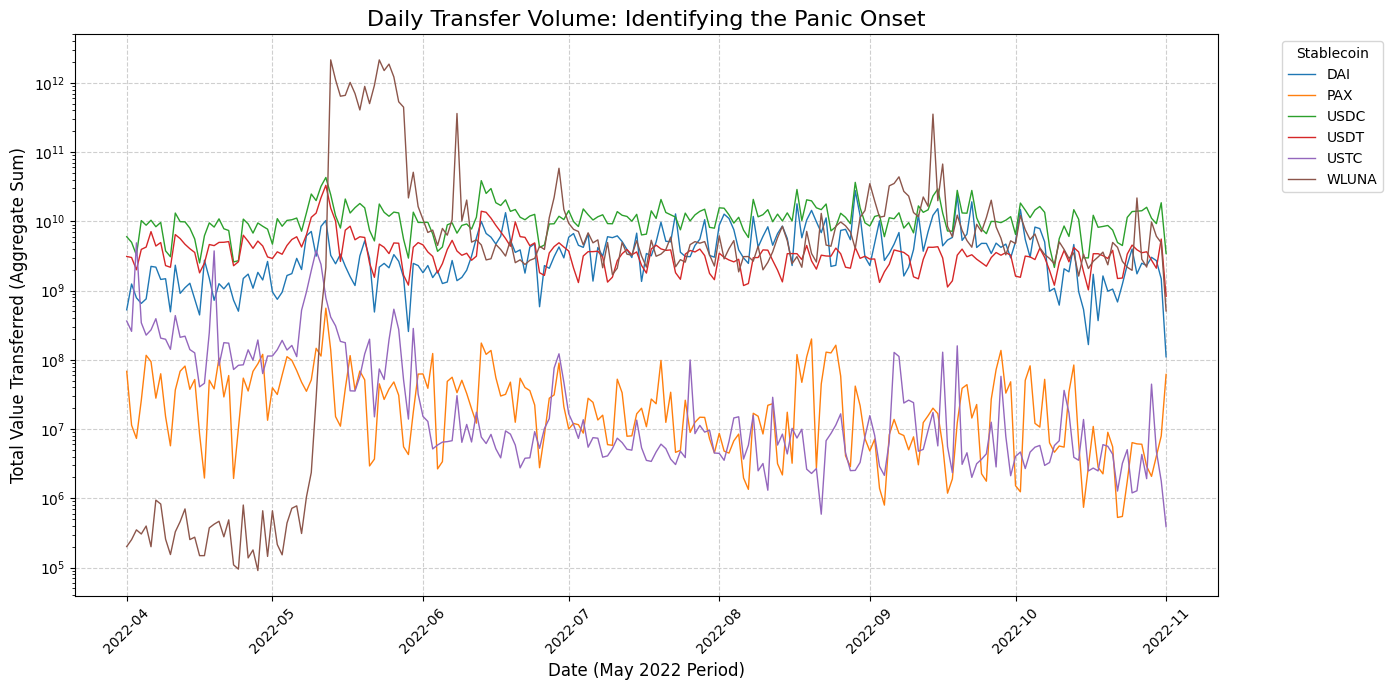

In [79]:
pivotD_df = daily_df.pivot(index='datetime', columns='coin_name', values='total_volume_transferred')
# 3. Create the Plot
plt.figure(figsize=(14, 7))
plt.yscale('log')

# Plot each coin
for coin_name in pivotD_df.columns:
    plt.plot(pivotD_df.index, pivotD_df[coin_name], label=coin_name, linewidth=1)

# 4. Enhance the Chart for the Case Study
plt.title('Daily Transfer Volume: Identifying the Panic Onset', fontsize=16)
plt.xlabel('Date (May 2022 Period)', fontsize=12)
plt.ylabel('Total Value Transferred (Aggregate Sum)', fontsize=12)
plt.legend(title='Stablecoin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()

#### Zoomed in on May

(np.float64(19113.0), np.float64(19142.0))

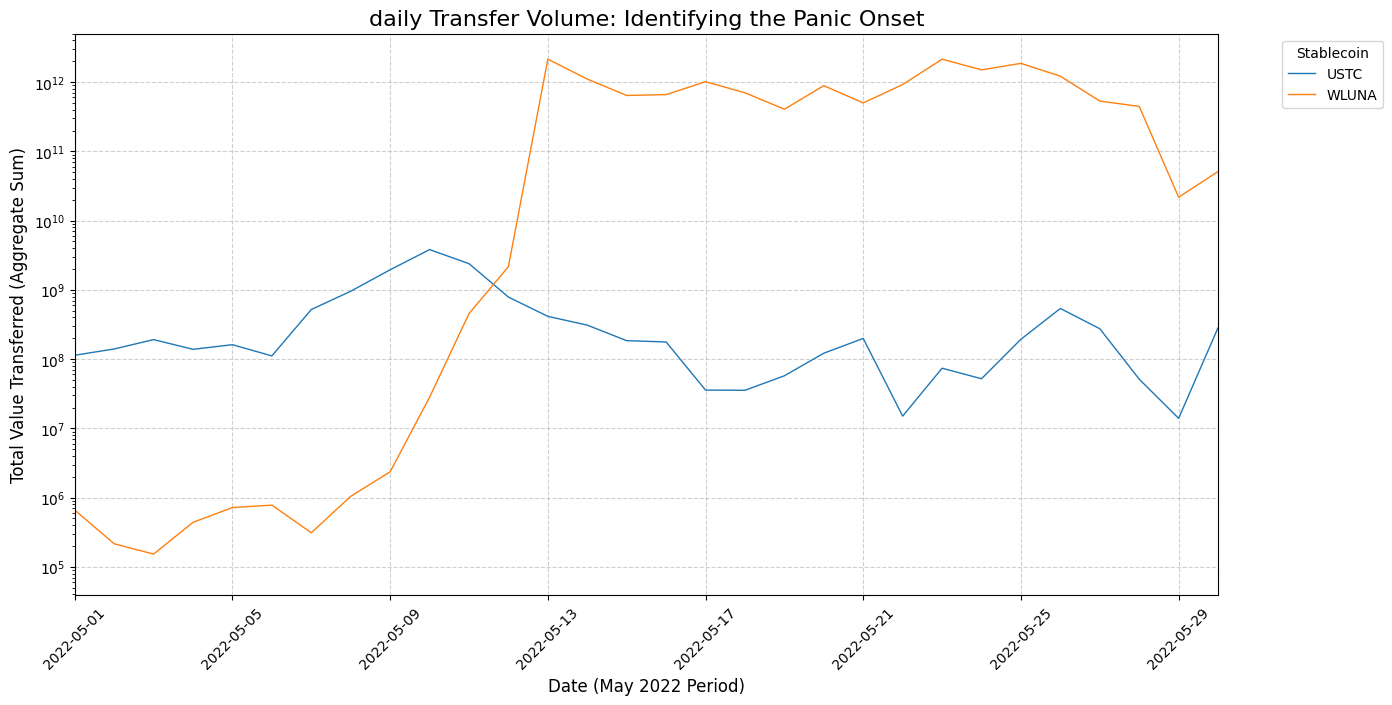

In [66]:
pivotD_df = daily_df.pivot(index='datetime', columns='coin_name', values='total_volume_transferred')
# 3. Create the Plot
plt.figure(figsize=(14, 7))
plt.yscale('log')

# Plot each coin
for coin_name in pivotD_df.columns:
    if coin_name == 'USTC' or coin_name == 'WLUNA':
        plt.plot(pivotD_df.index, pivotD_df[coin_name], label=coin_name, linewidth=1)

# 4. Enhance the Chart for the Case Study
plt.title('daily Transfer Volume: Identifying the Panic Onset', fontsize=16)
plt.xlabel('Date (May 2022 Period)', fontsize=12)
plt.ylabel('Total Value Transferred (Aggregate Sum)', fontsize=12)
plt.legend(title='Stablecoin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()
plt.xlim(pd.Timestamp('2022-05-01 00:00:00'), pd.Timestamp('2022-05-30 00:00:00'))

### hourly ver

In [67]:
# 4. Hourly Aggregation
# We group by the datetime (rounded to the hour) and the coin name
hourly_df = TTAC.groupby([pd.Grouper(key='datetime', freq='h'), 'coin_name'])['value'].sum().reset_index()

# Rename columns for clarity
hourly_df.rename(columns={'value': 'total_volume_transferred'}, inplace=True)
print(hourly_df)

                 datetime coin_name  total_volume_transferred
0     2022-04-01 11:00:00       DAI              2.174219e+07
1     2022-04-01 11:00:00       PAX              6.364146e+05
2     2022-04-01 11:00:00      USDC              2.282559e+08
3     2022-04-01 11:00:00      USDT              3.871481e+08
4     2022-04-01 11:00:00      USTC              1.058221e+07
...                   ...       ...                       ...
30623 2022-11-01 04:00:00       PAX              3.318194e+04
30624 2022-11-01 04:00:00      USDC              4.702541e+08
30625 2022-11-01 04:00:00      USDT              1.745930e+08
30626 2022-11-01 04:00:00      USTC              1.553252e+05
30627 2022-11-01 04:00:00     WLUNA              2.665641e+07

[30628 rows x 3 columns]


#### Plot graph over all datetimes

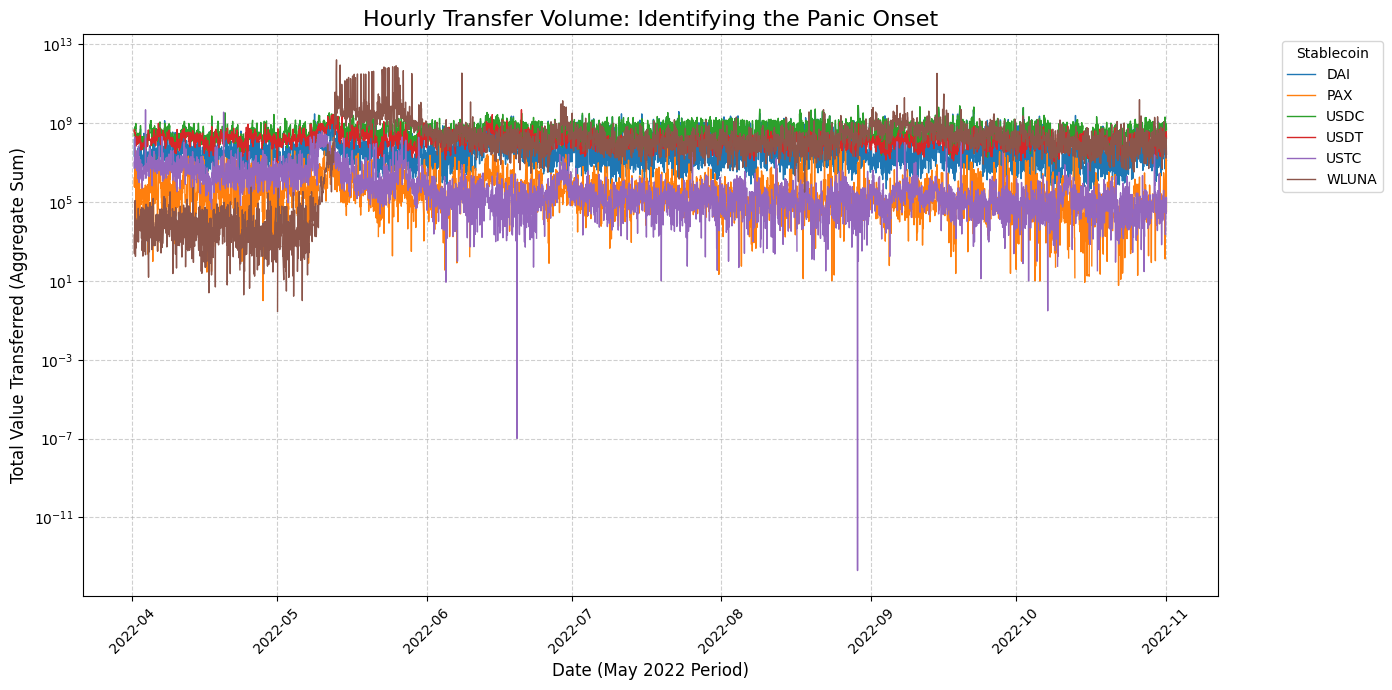

In [68]:
pivot_df = hourly_df.pivot(index='datetime', columns='coin_name', values='total_volume_transferred')
# 3. Create the Plot
plt.figure(figsize=(14, 7))
plt.yscale('log')

# Plot each coin
for coin_name in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[coin_name], label=coin_name, linewidth=1)

# 4. Enhance the Chart for the Case Study
plt.title('Hourly Transfer Volume: Identifying the Panic Onset', fontsize=16)
plt.xlabel('Date (May 2022 Period)', fontsize=12)
plt.ylabel('Total Value Transferred (Aggregate Sum)', fontsize=12)
plt.legend(title='Stablecoin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()

#### Zoomed in on May

(np.float64(19120.0), np.float64(19132.0))

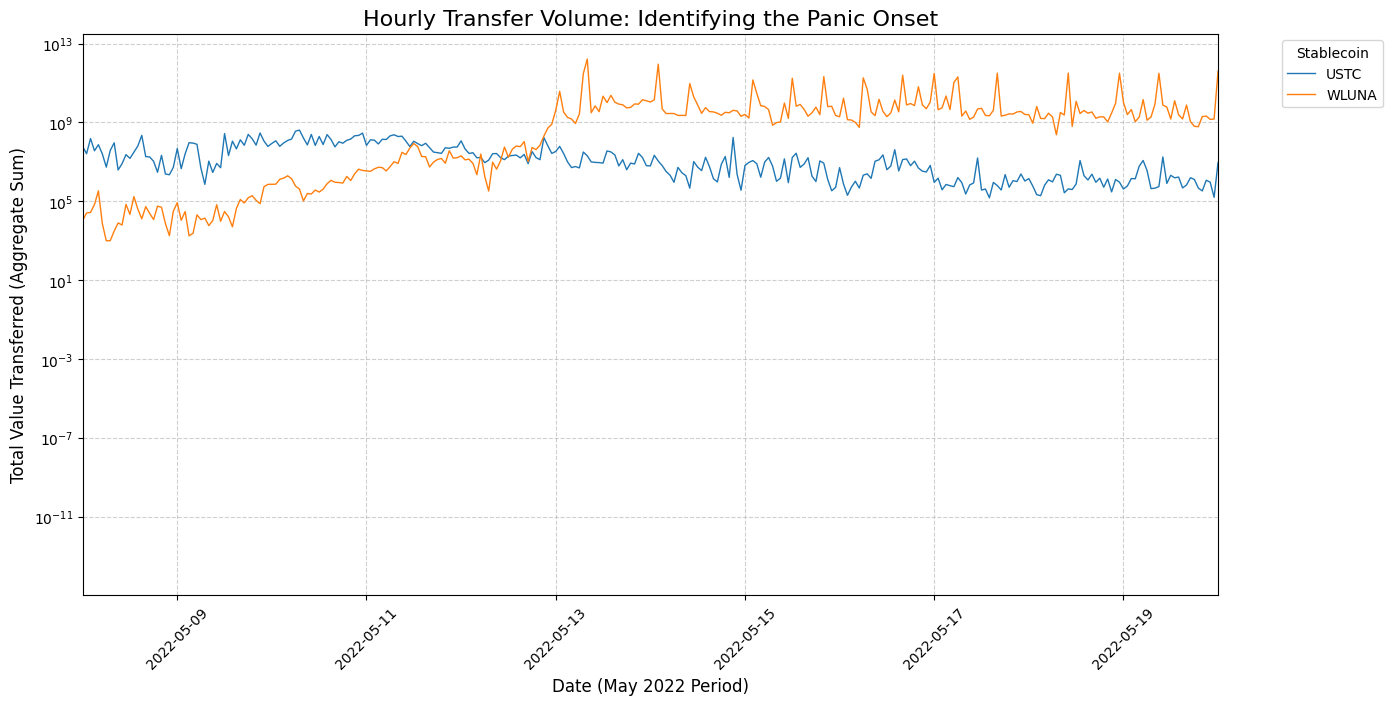

In [69]:
pivot_df = hourly_df.pivot(index='datetime', columns='coin_name', values='total_volume_transferred')
# 3. Create the Plot
plt.figure(figsize=(14, 7))
plt.yscale('log')

# Plot each coin
for coin_name in pivot_df.columns:
    if coin_name == 'USTC' or coin_name == 'WLUNA':
        plt.plot(pivot_df.index, pivot_df[coin_name], label=coin_name, linewidth=1)

# 4. Enhance the Chart for the Case Study
plt.title('Hourly Transfer Volume: Identifying the Panic Onset', fontsize=16)
plt.xlabel('Date (May 2022 Period)', fontsize=12)
plt.ylabel('Total Value Transferred (Aggregate Sum)', fontsize=12)
plt.legend(title='Stablecoin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()
plt.xlim(pd.Timestamp('2022-05-08 00:00:00'), pd.Timestamp('2022-05-20 00:00:00'))

# Price

## file opening

In [10]:
with zipfile.ZipFile("ERC20-stablecoins.zip") as outer_zip:
    nested_zip = outer_zip.read("price_data.zip")
    # Open the nested zip
    with zipfile.ZipFile(io.BytesIO(nested_zip)) as inner_zip:
        # Open the CSV from the nested zip
        with inner_zip.open("price_data/dai_price_data.csv") as f:
            DAIP = pd.read_csv(f)
        with inner_zip.open("price_data/pax_price_data.csv") as f:
            PAXP = pd.read_csv(f)
        with inner_zip.open("price_data/usdc_price_data.csv") as f:
            USDCP = pd.read_csv(f)
        with inner_zip.open("price_data/usdt_price_data.csv") as f:
            USDTP = pd.read_csv(f)
        with inner_zip.open("price_data/ustc_price_data.csv") as f:
            USTCP = pd.read_csv(f)
        with inner_zip.open("price_data/wluna_price_data.csv") as f:
            WLUP = pd.read_csv(f)

## merge into a single dataframe

In [11]:
# List of your dataframes and their corresponding names
dfs = [DAIP, PAXP, USDCP, USDTP, USTCP, WLUP]
names = ['DAI', 'PAX', 'USDC', 'USDT', 'USTC', 'WLUNA']

# Add the coin name to each dataframe
for df, name in zip(dfs, names):
    df['coin_name'] = name

# Stack them into one master dataframe
all_prices = pd.concat(dfs, ignore_index=True)
print(all_prices)

       timestamp      open      high       low     close coin_name
0     1648857600  0.999900  1.000000  0.998900  1.000000       DAI
1     1648944000  1.000000  1.000000  0.998900  0.999000       DAI
2     1649030400  0.999000  1.000000  0.998900  0.999500       DAI
3     1649116800  0.999400  1.000000  0.998700  0.999900       DAI
4     1649203200  0.999900  1.000000  0.998800  0.999100       DAI
...          ...       ...       ...       ...       ...       ...
1285  1667001600  0.000239  0.000252  0.000235  0.000241     WLUNA
1286  1667088000  0.000241  0.000249  0.000229  0.000236     WLUNA
1287  1667174400  0.000236  0.000268  0.000230  0.000244     WLUNA
1288  1667260800  0.000244  0.000255  0.000233  0.000236     WLUNA
1289  1667347200  0.000236  0.000242  0.000210  0.000218     WLUNA

[1290 rows x 6 columns]


## data cleaning function

In [3]:
def clean_price_data(dfO):
    df = dfO.copy()

    print("--- 1. Checking for Null Values ---")
    null_counts = df.isnull().sum()
    if (null_counts > 0).any():
        print(null_counts[null_counts > 0])
    else:
        print("No missing values found.")

    print("\n--- 2. Removing unusable rows with missing OHLC ---")
    before = len(df)
    df = df.dropna(subset=['open','high','low','close'])
    print(f"Rows dropped due to missing OHLC: {before - len(df)}")

    print("\n--- 3. Checking for Duplicate Transactions ---")
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows found: {duplicates}")

    df = df.drop_duplicates(subset=['timestamp','coin_name'], keep='last')
    df = df.sort_values(['coin_name','timestamp'])

    # Forward-fill small gaps within each coin
    df[['open','high','low','close']] = (
        df
        .groupby('coin_name')[['open','high','low','close']]
        .ffill()
    )

    print("\n--- 4. Checking for Abnormal Values ---")

    zero_prices = ((df['close'] <= 0) | (df['open'] <= 0)).sum()
    print(f"Zero or negative prices found: {zero_prices}")

    invalid_spread_mask = ~(
        (df['high'] >= df['low']) &
        (df['high'] >= df[['open','close']].max(axis=1)) &
        (df['low'] <= df[['open','close']].min(axis=1))
    )

    print(f"Invalid OHLC spreads found: {invalid_spread_mask.sum()}")

    df = df.loc[
        (df['close'] > 0) &
        (df['open'] > 0) &
        ~invalid_spread_mask
    ]

    # Convert timestamp to datetime
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

    return df


## data cleaning

In [22]:
APC = clean_price_data(all_prices)
print (APC)
APC.to_csv("AllPrices_cleaned.csv", index=False)

--- 1. Checking for Null Values ---
No missing values found.

--- 2. Checking for Duplicate Transactions ---
Duplicate rows found: 0

--- 3. Checking for Abnormal Values ---
Zero or negative prices found: 0
Invalid OHLC spreads found: 0
       timestamp        open        high        low       close coin_name  \
0     1648857600    0.999900    1.000000    0.99890    1.000000       DAI   
860   1648857600    1.000000    1.000000    0.99890    1.000000      USTC   
1075  1648857600  103.230000  107.280000  100.03000  105.870000     WLUNA   
645   1648857600    1.000000    1.000000    1.00000    1.000000      USDT   
430   1648857600    0.999500    1.000000    0.99900    0.999900      USDC   
...          ...         ...         ...        ...         ...       ...   
859   1667347200    0.999900    0.999900    0.99980    0.999900      USDT   
429   1667347200    0.999000    1.010000    0.99420    0.998300       PAX   
214   1667347200    0.999900    1.000000    0.99900    0.999900       

## Alternatively used cleaned csv file to load data

In [14]:
APC = pd.read_csv("data/AllPrices_cleaned.csv")

## add column interday range(high-low)

In [23]:
APC["intraday range"]=APC["high"]-APC["low"]
print(APC)

       timestamp        open        high        low       close coin_name  \
0     1648857600    0.999900    1.000000    0.99890    1.000000       DAI   
860   1648857600    1.000000    1.000000    0.99890    1.000000      USTC   
1075  1648857600  103.230000  107.280000  100.03000  105.870000     WLUNA   
645   1648857600    1.000000    1.000000    1.00000    1.000000      USDT   
430   1648857600    0.999500    1.000000    0.99900    0.999900      USDC   
...          ...         ...         ...        ...         ...       ...   
859   1667347200    0.999900    0.999900    0.99980    0.999900      USDT   
429   1667347200    0.999000    1.010000    0.99420    0.998300       PAX   
214   1667347200    0.999900    1.000000    0.99900    0.999900       DAI   
1074  1667347200    0.037760    0.038480    0.03715    0.037260      USTC   
1289  1667347200    0.000236    0.000242    0.00021    0.000218     WLUNA   

       datetime  intraday range  
0    2022-04-02        0.001100  
860  20

## create piviot table by coins

In [24]:
# 1. Create a pivot table for Closing Prices
# This is used to visualize the "Death Spiral" of USTC and WLUNA
volatilit_pivot = APC.pivot(index='datetime', columns='coin_name', values='close')

# 2. Create a pivot table for Intraday Range
# This identifies periods of high stress and automated arbitrage failure
volatility_pivot = APC.pivot(index='datetime', columns='coin_name', values='intraday range')


print("Price Pivot Table Preview:")
print(volatilit_pivot.head())

print("intraday range Pivot Table Preview:")
print(volatility_pivot.head())

Price Pivot Table Preview:
coin_name      DAI     PAX    USDC  USDT    USTC   WLUNA
datetime                                                
2022-04-02  1.0000  1.0000  0.9999   1.0  1.0000  105.87
2022-04-03  0.9990  1.0000  0.9993   1.0  1.0000  115.49
2022-04-04  0.9995  1.0000  1.0000   1.0  0.9999  113.46
2022-04-05  0.9999  1.0000  1.0000   1.0  1.0000  115.96
2022-04-06  0.9991  0.9998  0.9997   1.0  0.9984  116.10
intraday range Pivot Table Preview:
coin_name      DAI     PAX    USDC  USDT    USTC  WLUNA
datetime                                               
2022-04-02  0.0011  0.0038  0.0010   0.0  0.0011   7.25
2022-04-03  0.0011  0.0018  0.0009   0.0  0.0014  11.02
2022-04-04  0.0011  0.0025  0.0015   0.0  0.0010   4.97
2022-04-05  0.0013  0.0014  0.0011   0.0  0.0037   6.05
2022-04-06  0.0012  0.0027  0.0010   0.0  0.0024   2.67


## Analysis of closing price over time

### plot graph of closing price against time

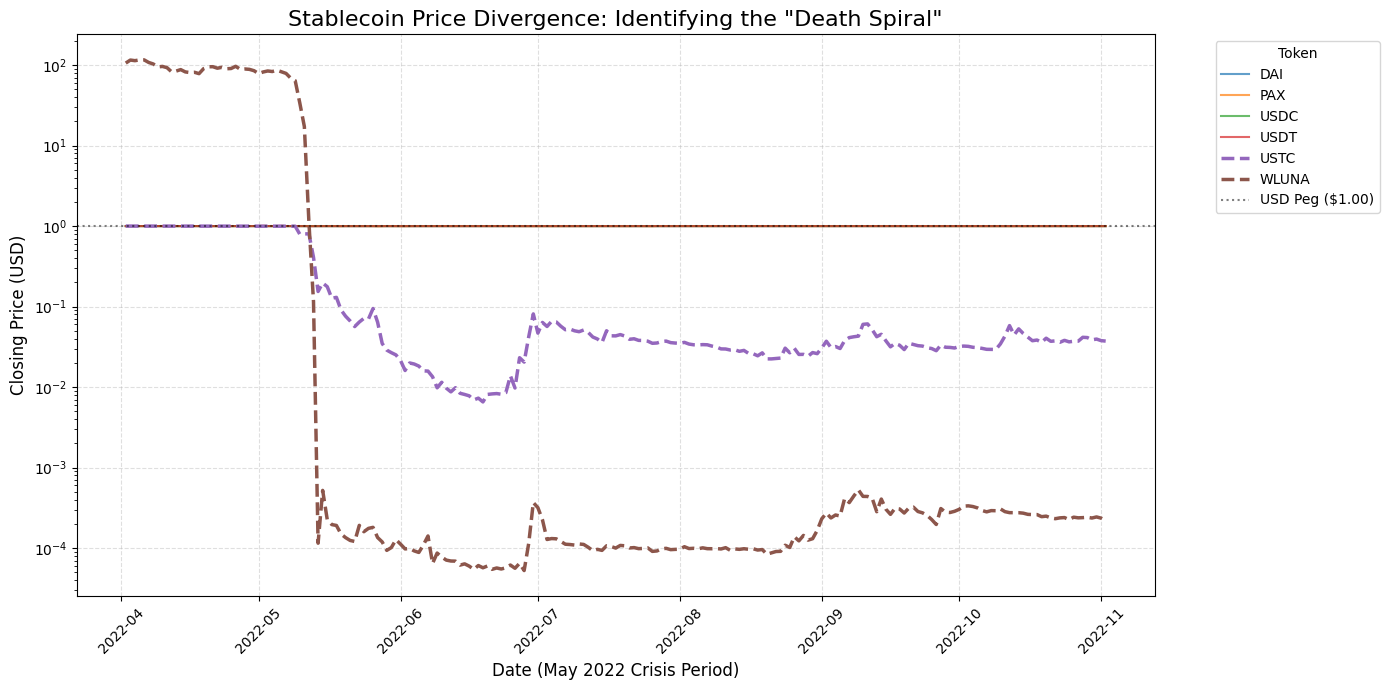

In [25]:
# 1. Initialize the figure
plt.figure(figsize=(14, 7))

# 2. Plot each coin from your pivot table
for coin in volatilit_pivot.columns:
    if coin in ['USTC', 'WLUNA']:
        # Highlight the crashing coins with a thicker dashed line
        plt.plot(volatilit_pivot.index, volatilit_pivot[coin], label=coin, linewidth=2.5, linestyle='--')
    else:
        # Others are shown normally to check for peg stability
        plt.plot(volatilit_pivot.index, volatilit_pivot[coin], label=coin, alpha=0.7)

# 3. Add a reference line for the $1.00 USD Peg
plt.axhline(y=1.0, color='black', linestyle=':', alpha=0.5, label='USD Peg ($1.00)')

# 4. Enhance the chart
plt.title('Stablecoin Price Divergence: Identifying the "Death Spiral"', fontsize=16)
plt.xlabel('Date (May 2022 Crisis Period)', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(title='Token', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)

# IMPORTANT: Using a Log Scale helps visualize WLUNA's drop from $80 to $0.0001
plt.yscale('log')

plt.tight_layout()
plt.show()

### Zoomed in to May

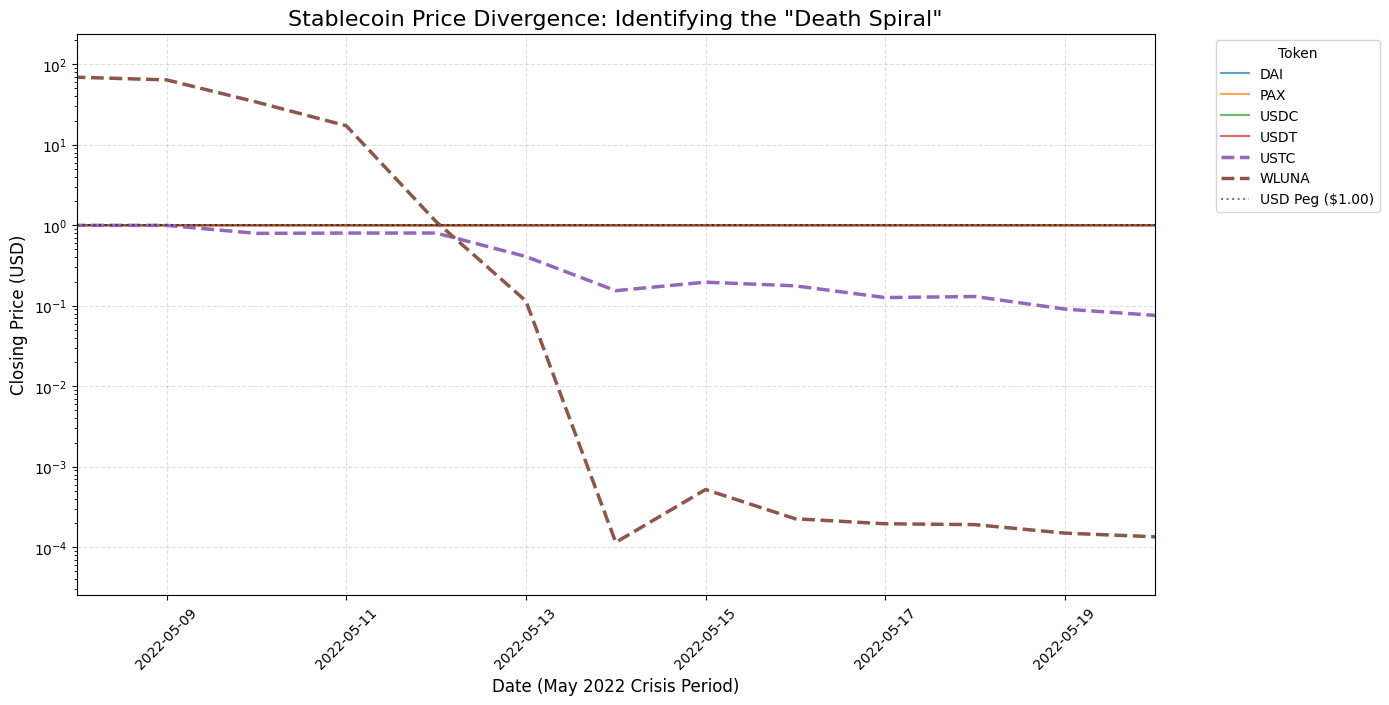

In [31]:
# 1. Initialize the figure
plt.figure(figsize=(14, 7))

# 2. Plot each coin from your pivot table
for coin in volatilit_pivot.columns:
    if coin in ['USTC', 'WLUNA']:
        # Highlight the crashing coins with a thicker dashed line
        plt.plot(volatilit_pivot.index, volatilit_pivot[coin], label=coin, linewidth=2.5, linestyle='--')
    else:
        # Others are shown normally to check for peg stability
        plt.plot(volatilit_pivot.index, volatilit_pivot[coin], label=coin, alpha=0.7)

# 3. Add a reference line for the $1.00 USD Peg
plt.axhline(y=1.0, color='black', linestyle=':', alpha=0.5, label='USD Peg ($1.00)')


# 4. Enhance the chart
plt.title('Stablecoin Price Divergence: Identifying the "Death Spiral"', fontsize=16)
plt.xlabel('Date (May 2022 Crisis Period)', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(title='Token', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)

# IMPORTANT: Using a Log Scale helps visualize WLUNA's drop from $80 to $0.0001
plt.yscale('log')

plt.tight_layout()
plt.xlim(pd.Timestamp('2022-05-08 00:00:00'), pd.Timestamp('2022-05-20 00:00:00'))
plt.show()

## Analysis of interday range over time

### plot of interday range against time

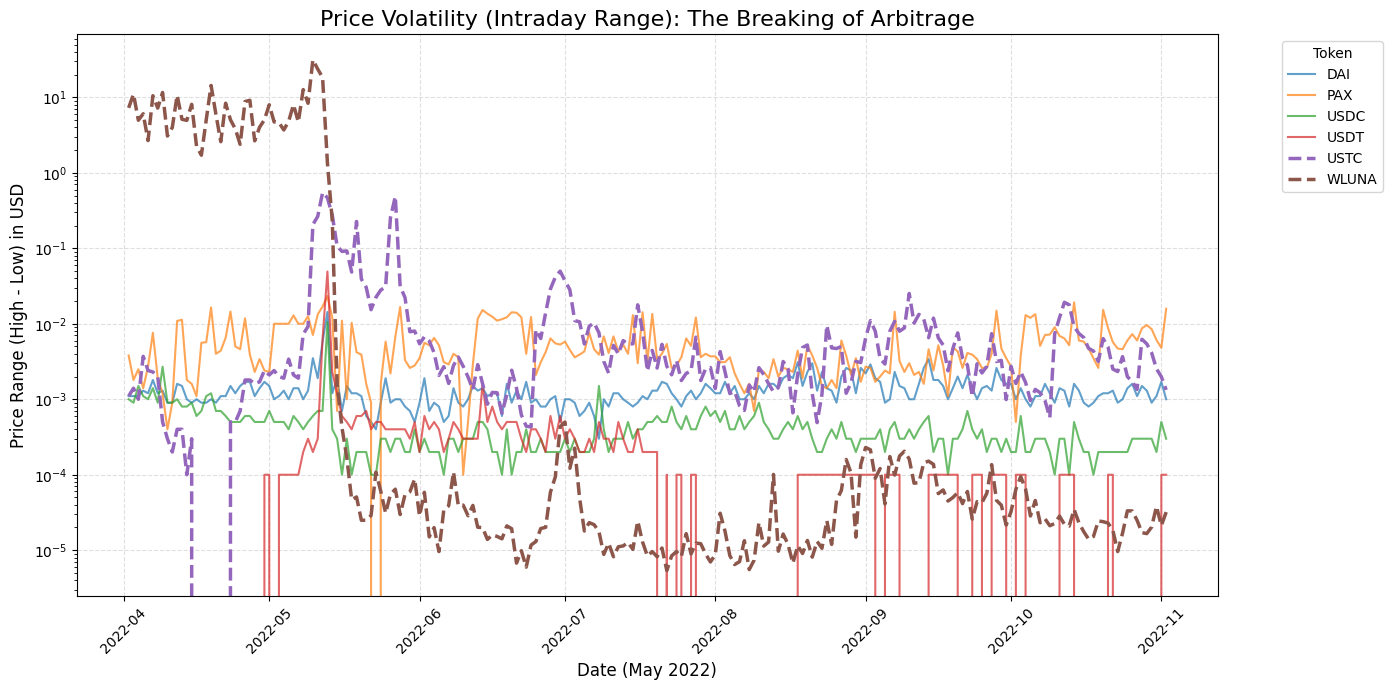

In [30]:
# 1. Initialize the figure
plt.figure(figsize=(14, 7))

# 2. Plot each coin from your pivot table
for coin in volatility_pivot.columns:
    if coin in ['USTC', 'WLUNA']:
        # Highlight the crashing coins with a thicker dashed line
        plt.plot(volatility_pivot.index, volatility_pivot[coin], label=coin, linewidth=2.5, linestyle='--')
    else:
        # Others are shown normally to check for peg stability
        plt.plot(volatility_pivot.index, volatility_pivot[coin], label=coin, alpha=0.7)

# 4. Enhance the chart
plt.title('Price Volatility (Intraday Range): The Breaking of Arbitrage', fontsize=16)
plt.xlabel('Date (May 2022)', fontsize=12)
plt.ylabel('Price Range (High - Low) in USD', fontsize=12)
plt.legend(title='Token', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)

# IMPORTANT: Using a Log Scale helps visualize WLUNA's drop from $80 to $0.0001
plt.yscale('log')

plt.tight_layout()
plt.show()

### zoom into may


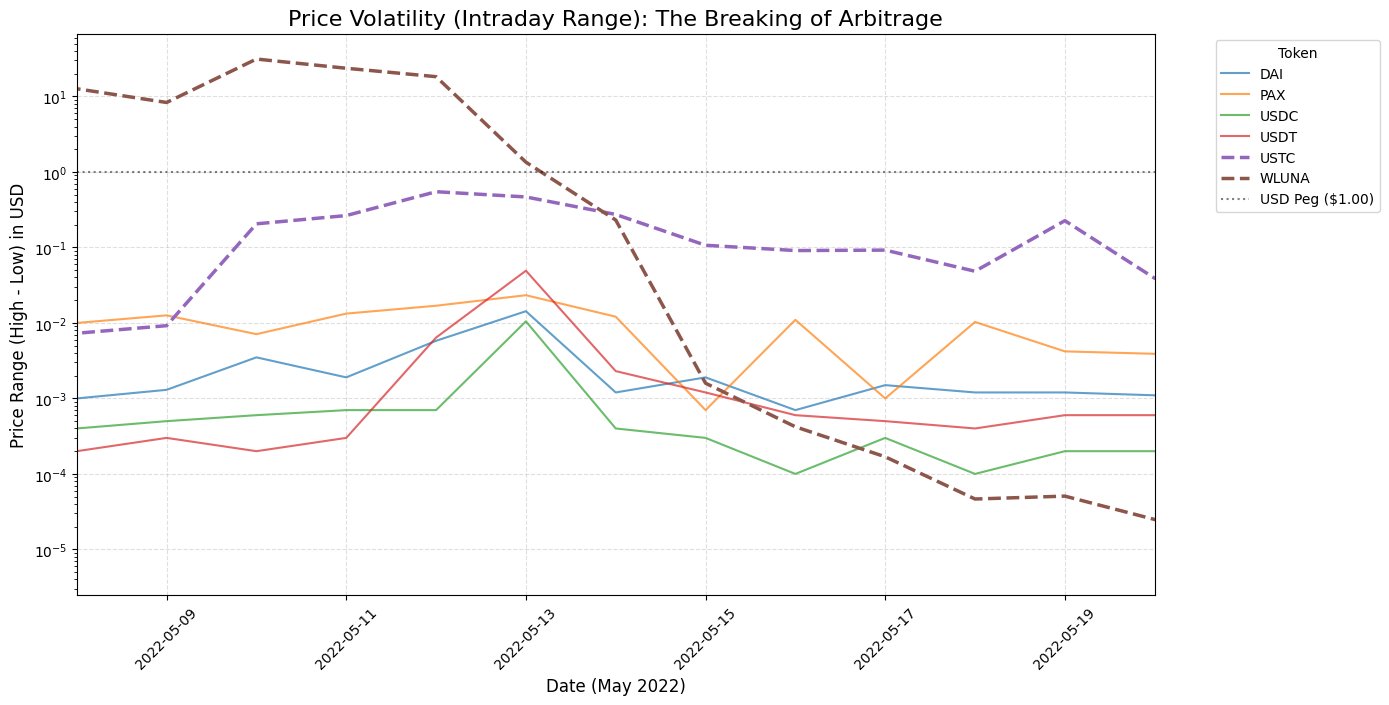

In [28]:
# 1. Initialize the figure
plt.figure(figsize=(14, 7))

# 2. Plot each coin from your pivot table
for coin in volatility_pivot.columns:
    if coin in ['USTC', 'WLUNA']:
        # Highlight the crashing coins with a thicker dashed line
        plt.plot(volatility_pivot.index, volatility_pivot[coin], label=coin, linewidth=2.5, linestyle='--')
    else:
        # Others are shown normally to check for peg stability
        plt.plot(volatility_pivot.index, volatility_pivot[coin], label=coin, alpha=0.7)

# 4. Enhance the chart
plt.title('Price Volatility (Intraday Range): The Breaking of Arbitrage', fontsize=16)
plt.xlabel('Date (May 2022)', fontsize=12)
plt.ylabel('Price Range (High - Low) in USD', fontsize=12)
plt.legend(title='Token', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)

# IMPORTANT: Using a Log Scale helps visualize WLUNA's drop from $80 to $0.0001
plt.yscale('log')

plt.tight_layout()
plt.xlim(pd.Timestamp('2022-05-08 00:00:00'), pd.Timestamp('2022-05-20 00:00:00'))
plt.show()

# Events

In [13]:
with zipfile.ZipFile("ERC20-stablecoins.zip") as z:
    with z.open("event_data.csv") as f:
        EV = pd.read_csv(f, encoding='latin-1')
        print(EV)

                                                event   timestamp      type  \
0   BlackRock and Fidelity Back USDC in $400 Milli...  1649721600  positive   
1   Terra UST takes over BUSD to become third larg...  1650412800  positive   
2   LARGE amounts of UST selling on ANCHOR (approx...  1651881600  negative   
3   UST depegs LFG deploys assets to defend peg (7...  1651968000  negative   
4     UST Depegs again to 35 cents LUNA keeps falling  1652054400  negative   
5                        LUNA Collapses by almost 99%  1652313600  negative   
6   UST Downfall Brings Record Volumes to Curve: I...  1652313600  negative   
7   Terra Halts Its Blockchain and Binance Suspend...  1652400000  negative   
8      LUNA essentially worthless (1/100th of a cent)  1652486400  negative   
9   Luna Foundation Guard 80000 Bitcoin Lighter Af...  1652659200  negative   
10            Tether Token (USDT) Launches on Polygon  1653609600  positive   
11            Tether Tokens (USDT) to Launch on Tezo

In [14]:
EV['datetime'] = pd.to_datetime(EV['timestamp'], unit='s')
EV.drop(columns=['timestamp'], inplace=True)
EV.drop(columns=['event'], inplace=True)
print(EV)

        type stablecoin   datetime
0   positive       usdc 2022-04-12
1   positive       ustc 2022-04-20
2   negative       ustc 2022-05-07
3   negative       ustc 2022-05-08
4   negative       ustc 2022-05-09
5   negative  lunaterra 2022-05-12
6   negative       ustc 2022-05-12
7   negative  lunaterra 2022-05-13
8   negative  lunaterra 2022-05-14
9   negative  lunaterra 2022-05-16
10  positive       usdt 2022-05-27
11  positive       usdt 2022-06-09
12  negative    unknown 2022-06-11
13  positive        dai 2022-06-13
14  positive       usdc 2022-06-13
15  negative       usdc 2022-08-08
16  positive    unknown 2022-08-11
17  negative        dai 2022-08-11
18  negative       usdc 2022-08-22
19  positive       usdc 2022-08-31
20  positive        dai 2022-08-31
21  negative  lunaterra 2022-09-02
22  positive  lunaterra 2022-09-05
23  negative  lunaterra 2022-09-06
24  negative  lunaterra 2022-09-07
25  positive  lunaterra 2022-09-09
26  negative    unknown 2022-09-11
27  positive    unkn

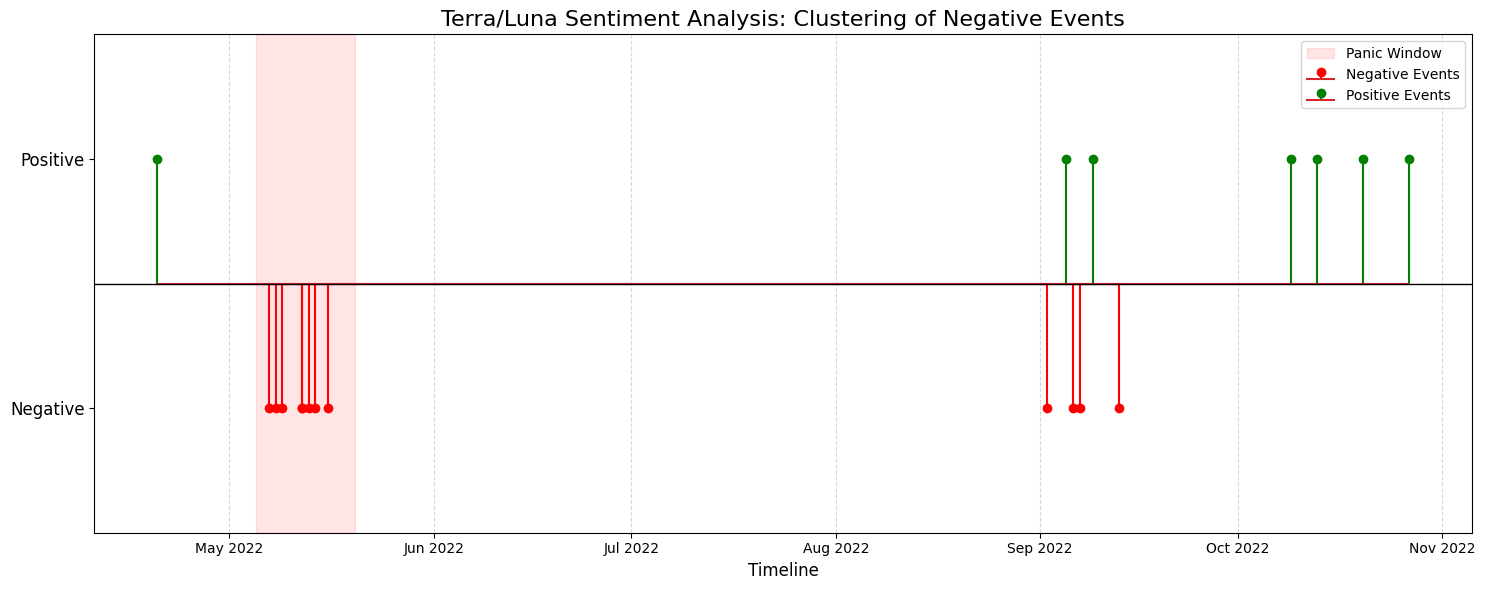

In [21]:

# 2. Filter for Terra/Luna Ecosystem only
terra_luna = EV[EV['stablecoin'].isin(['ustc', 'lunaterra'])].copy()
terra_luna = terra_luna.sort_values('datetime')
terra_luna['y'] = terra_luna['type'].map({'positive': 1, 'negative': -1})

# 3. Create the Plot
plt.figure(figsize=(15, 6))

# Separate data for coloring
pos = terra_luna[terra_luna['type'] == 'positive']
neg = terra_luna[terra_luna['type'] == 'negative']

# Plot Negative events in Red
plt.stem(neg['datetime'], neg['y'], linefmt='r-', markerfmt='ro', label='Negative Events')
# Plot Positive events in Green
plt.stem(pos['datetime'], pos['y'], linefmt='g-', markerfmt='go', label='Positive Events')

# 4. Styling and Annotations
plt.axhline(0, color='black', linewidth=1) # Baseline
plt.ylim(-2, 2)
plt.yticks([-1, 1], ['Negative', 'Positive'], fontsize=12)

# Highlight the core crash period in May
plt.axvspan(pd.Timestamp('2022-05-05'), pd.Timestamp('2022-05-20'), color='red', alpha=0.1, label='Panic Window')

plt.title('Terra/Luna Sentiment Analysis: Clustering of Negative Events', fontsize=16)
plt.xlabel('Timeline', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend()

# Date Formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# 2008 GFC

In [8]:
GFC = read_csv("gfc data/^DJI.csv")
print(GFC)

           Price             Close              High               Low  \
0         Ticker              ^DJI              ^DJI              ^DJI   
1           Date               NaN               NaN               NaN   
2     2005-01-03     10729.4296875  10867.3896484375     10710.0703125   
3     2005-01-04  10630.7802734375  10769.5595703125   10605.150390625   
4     2005-01-05   10597.830078125     10684.4296875          10597.75   
...          ...               ...               ...               ...   
2009  2012-12-21    13190.83984375  13309.9501953125  13122.5302734375   
2010  2012-12-24     13138.9296875  13190.3798828125  13128.5498046875   
2011  2012-12-26    13114.58984375  13174.8798828125  13076.8701171875   
2012  2012-12-27  13096.3095703125   13141.740234375   12964.080078125   
2013  2012-12-28  12938.1103515625  13095.4599609375  12926.8603515625   

                  Open     Volume  
0                 ^DJI       ^DJI  
1                  NaN        NaN  
2  

test for gfc

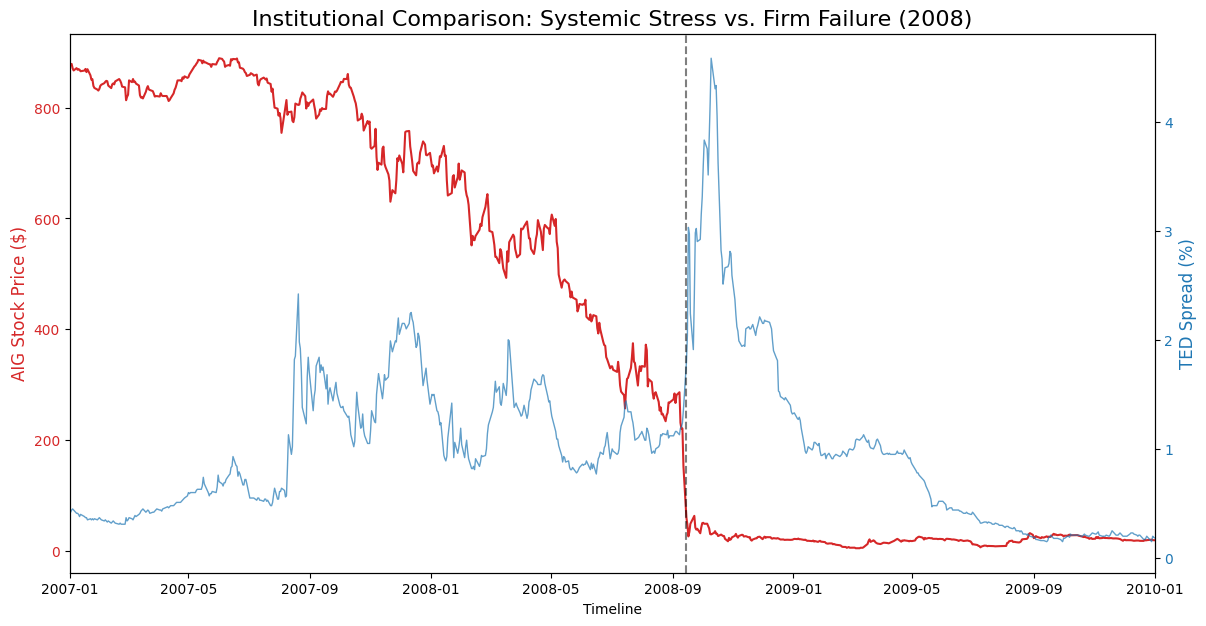

In [2]:

# 1. Load the TED Rate (Measures Market Stress/Fear)
ted = pd.read_csv('gfc data/TEDRATE.csv')
ted['observation_date'] = pd.to_datetime(ted['observation_date'])
# Clean numeric data (handle dots/missing values)
ted['TEDRATE'] = pd.to_numeric(ted['TEDRATE'], errors='coerce')
ted = ted.dropna().sort_values('observation_date')

# 2. Load AIG Stock Price (Firm-level Impact)
# Note: Firm CSVs have a multi-row header, so we skip to the actual data
aig = pd.read_csv('gfc data/AIG.csv', skiprows=3, names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])
aig['Date'] = pd.to_datetime(aig['Date'])
aig = aig.sort_values('Date')

# 3. Create a dual-axis plot for the 2008 Crisis period
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot AIG Price on the left axis (Firm Failure)
color_aig = 'tab:red'
ax1.set_xlabel('Timeline')
ax1.set_ylabel('AIG Stock Price ($)', color=color_aig, fontsize=12)
ax1.plot(aig['Date'], aig['Close'], color=color_aig, linewidth=1.5, label='AIG Price')
ax1.tick_params(axis='y', labelcolor=color_aig)

# Create a second axis for the TED Rate (Systemic Stress)
ax2 = ax1.twinx()
color_ted = 'tab:blue'
ax2.set_ylabel('TED Spread (%)', color=color_ted, fontsize=12)
ax2.plot(ted['observation_date'], ted['TEDRATE'], color=color_ted, linewidth=1, alpha=0.7, label='TED Spread')
ax2.tick_params(axis='y', labelcolor=color_ted)

# Zoom into the Peak Crisis years (2007-2009)
plt.xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2010-01-01'))

# Annotate the September 2008 Lehman/AIG Moment
plt.axvline(x=pd.Timestamp('2008-09-15'), color='black', linestyle='--', alpha=0.5)
plt.title('Institutional Comparison: Systemic Stress vs. Firm Failure (2008)', fontsize=16)

plt.savefig('2008_crisis_comparison.png')
plt.show()

# File loading

In [38]:
# Load all datasets
print("\n1. LOADING DATA...")
print("-"*80)

data_files = {
    'GSPC': 'gfc data/^GSPC.csv',
    'DJI': 'gfc data/^DJI.csv',
    'VIX': 'gfc data/^VIX.csv',
    'TEDRATE': 'gfc data/TEDRATE.csv',
    'WGS3MO': 'gfc data/WGS3MO.csv',
    'AIG': 'gfc data/AIG.csv',
    'C': 'gfc data/C.csv',
    'JPM': 'gfc data/JPM.csv'
}

# Load data into dictionary
data = {}
for name, filepath in data_files.items():
    if name in ['TEDRATE', 'WGS3MO']:
        # These files have different format
        df = pd.read_csv(filepath)
        df['observation_date'] = pd.to_datetime(df['observation_date'])
        df = df.set_index('observation_date')
        df = df.sort_index()
    else:
        # Stock data files have 'Price' column with dates
        df = pd.read_csv(filepath, skiprows=3)  # Skip header rows
        df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.set_index('Date')
        df = df.sort_index()
        # Convert numeric columns
        for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    data[name] = df
    print(f"✓ Loaded {name}: {len(df)} records from {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")

print("\n2. DATA INSPECTION")
print("-"*80)

# Inspect first few rows of each dataset
for name, df in data.items():
    print(f"\n{name} columns: {list(df.columns)}")
    print(df.head(3))


1. LOADING DATA...
--------------------------------------------------------------------------------
✓ Loaded GSPC: 2011 records from 2005-01-04 to 2012-12-28
✓ Loaded DJI: 2011 records from 2005-01-04 to 2012-12-28
✓ Loaded VIX: 2011 records from 2005-01-04 to 2012-12-28
✓ Loaded TEDRATE: 2085 records from 2005-01-04 to 2012-12-31
✓ Loaded WGS3MO: 417 records from 2005-01-07 to 2012-12-28
✓ Loaded AIG: 2011 records from 2005-01-04 to 2012-12-28
✓ Loaded C: 2011 records from 2005-01-04 to 2012-12-28
✓ Loaded JPM: 2011 records from 2005-01-04 to 2012-12-28

2. DATA INSPECTION
--------------------------------------------------------------------------------

GSPC columns: ['Close', 'High', 'Low', 'Open', 'Volume']
                  Close         High          Low         Open      Volume
Date                                                                      
2005-01-04  1188.050049  1205.839966  1185.390015  1202.079956  1721000000
2005-01-05  1183.739990  1192.729980  1183.719971  118

# clean price functions(DJI,GSPC,AIG,C,JPM)
use the same clean p

In [39]:
def cleanBasic(df, name):
    """
    Cleans OHLC stock data. Handles 'Date' as an index or a column.
    """
    # 1. Reset index if 'Date' is the index to allow cleaning
    if df.index.name == 'Date':
        df = df.reset_index()

    # 2. Check for Nulls in essential price columns
    initial_count = len(df)
    df = df.dropna(subset=['Date', 'Close']).copy()

    # 3. Logic Check: Low > High
    # If data is corrupted where Low is higher than High, remove it.
    anomaly_mask = df['Low'] > df['High']
    anomaly_count = anomaly_mask.sum()
    df = df[~anomaly_mask].copy()

    # 4. Final Prep: Set index back to Date and sort
    df = df.sort_values('Date').set_index('Date')

    print(f"✓ {name:<8} | Dropped: {initial_count - len(df)} (Anomalies: {anomaly_count})")
    return df

# clean VIX function

In [40]:
def clean_vix(df):
    """
    Cleans VIX data and removes the empty Volume column.
    """
    if df.index.name == 'Date':
        df = df.reset_index()

    initial_count = len(df)

    # Logic Check: Low > High
    anomaly_mask = df['Low'] > df['High']
    anomaly_count = anomaly_mask.sum()
    df = df[~anomaly_mask].copy()

    # Remove Volume (irrelevant for VIX index)
    if 'Volume' in df.columns:
        df = df.drop(columns=['Volume'])

    df = df.dropna(subset=['Date', 'Close']).sort_values('Date').set_index('Date')

    print(f"✓ VIX      | Dropped: {initial_count - len(df)} (Anomalies: {anomaly_count})")
    return df

# clean indicators

In [41]:
def clean_indicators(df, name):
    """
    Cleans TEDRATE and WGS3MO. Converts 'observation_date' to 'Date'.
    """
    # 1. Standardize index/column name to 'Date'
    if df.index.name == 'observation_date':
        df.index.name = 'Date'

    if 'observation_date' in df.columns:
        df = df.rename(columns={'observation_date': 'Date'})

    # 2. Reset index to clean
    df = df.reset_index()

    initial_count = len(df)

    # Identify the value column (TEDRATE or WGS3MO)
    val_col = [c for c in df.columns if c != 'Date'][0]

    # Remove Nulls (especially important for TEDRATE '.' values)
    df = df.dropna(subset=['Date', val_col]).copy()

    # 3. Final Prep
    df = df.sort_values('Date').set_index('Date')

    print(f"✓ {name:<8} | Dropped: {initial_count - len(df)} rows")
    return df

#clean

In [22]:
print(data)

{'GSPC':                   Close         High          Low         Open      Volume
Date                                                                      
2005-01-04  1188.050049  1205.839966  1185.390015  1202.079956  1721000000
2005-01-05  1183.739990  1192.729980  1183.719971  1188.050049  1738900000
2005-01-06  1187.890015  1191.630005  1183.270020  1183.739990  1569100000
2005-01-07  1186.189941  1192.199951  1182.160034  1187.890015  1477900000
2005-01-10  1190.250000  1194.780029  1184.800049  1186.189941  1490400000
...                 ...          ...          ...          ...         ...
2012-12-21  1430.150024  1443.670044  1422.579956  1443.670044  5229160000
2012-12-24  1426.660034  1430.150024  1424.660034  1430.150024  1248960000
2012-12-26  1419.829956  1429.420044  1416.430054  1426.660034  2285030000
2012-12-27  1418.099976  1422.800049  1401.800049  1419.829956  2830180000
2012-12-28  1402.430054  1418.099976  1401.579956  1418.099976  2426680000

[2011 rows x 5 

In [46]:
print("3. CLEANING DATA...")
print("-" * 40)

for name in data:
    if name == 'VIX':
        data[name] = clean_vix(data[name])
    elif name in ['TEDRATE', 'WGS3MO']:
        data[name] = clean_indicators(data[name], name)
    else:
        # For GSPC, DJI, AIG, C, JPM
        data[name] = cleanBasic(data[name], name)

print("-" * 40)
print("✓ All datasets cleaned and indexed by 'Date'.")

3. CLEANING DATA...
----------------------------------------
✓ GSPC     | Dropped: 0 (Anomalies: 0)
✓ DJI      | Dropped: 0 (Anomalies: 0)
✓ VIX      | Dropped: 0 (Anomalies: 0)
✓ TEDRATE  | Dropped: 123 rows
✓ WGS3MO   | Dropped: 0 rows
✓ AIG      | Dropped: 0 (Anomalies: 0)
✓ C        | Dropped: 0 (Anomalies: 0)
✓ JPM      | Dropped: 0 (Anomalies: 0)
----------------------------------------
✓ All datasets cleaned and indexed by 'Date'.


In [47]:
print(data)

{'GSPC':                   Close         High          Low         Open      Volume
Date                                                                      
2005-01-04  1188.050049  1205.839966  1185.390015  1202.079956  1721000000
2005-01-05  1183.739990  1192.729980  1183.719971  1188.050049  1738900000
2005-01-06  1187.890015  1191.630005  1183.270020  1183.739990  1569100000
2005-01-07  1186.189941  1192.199951  1182.160034  1187.890015  1477900000
2005-01-10  1190.250000  1194.780029  1184.800049  1186.189941  1490400000
...                 ...          ...          ...          ...         ...
2012-12-21  1430.150024  1443.670044  1422.579956  1443.670044  5229160000
2012-12-24  1426.660034  1430.150024  1424.660034  1430.150024  1248960000
2012-12-26  1419.829956  1429.420044  1416.430054  1426.660034  2285030000
2012-12-27  1418.099976  1422.800049  1401.800049  1419.829956  2830180000
2012-12-28  1402.430054  1418.099976  1401.579956  1418.099976  2426680000

[2011 rows x 5 

# plots

## TEDRATE vs WGS (for 1b)

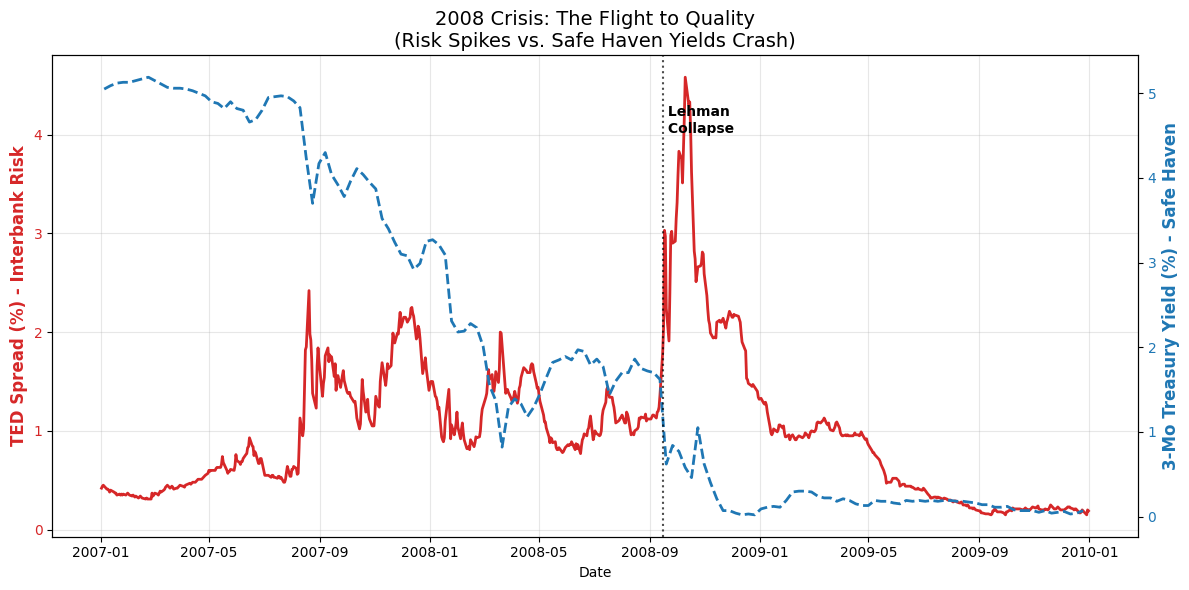

In [49]:
# 2. Filter for the GFC Period (2007 - 2009)
ted_df = data["TEDRATE"]
wgs_df = data ["WGS3MO"]

start_date = '2007-01-01'
end_date = '2009-12-31'

ted_gfc = ted_df.loc[start_date:end_date]
wgs_gfc = wgs_df.loc[start_date:end_date]

# 3. Create the Yield Divergence Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Axis 1: TED Spread (Stress Indicator)
color_ted = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('TED Spread (%) - Interbank Risk', color=color_ted, fontsize=12, fontweight='bold')
ax1.plot(ted_gfc.index, ted_gfc['TEDRATE'], color=color_ted, linewidth=2, label='TED Spread')
ax1.tick_params(axis='y', labelcolor=color_ted)
ax1.grid(True, alpha=0.3)

# Axis 2: 3-Month Treasury Yield (Safe Haven)
ax2 = ax1.twinx()
color_wgs = 'tab:blue'
ax2.set_ylabel('3-Mo Treasury Yield (%) - Safe Haven', color=color_wgs, fontsize=12, fontweight='bold')
ax2.plot(wgs_gfc.index, wgs_gfc['WGS3MO'], color=color_wgs, linewidth=2, linestyle='--', label='3-Mo Treasury')
ax2.tick_params(axis='y', labelcolor=color_wgs)

# Highlight Lehman Collapse
lehman_date = pd.Timestamp('2008-09-15')
plt.axvline(lehman_date, color='black', linestyle=':', alpha=0.7)
plt.text(lehman_date, 4.5, ' Lehman\n Collapse', rotation=0, verticalalignment='bottom', fontweight='bold')

plt.title('2008 Crisis: The Flight to Quality\n(Risk Spikes vs. Safe Haven Yields Crash)', fontsize=14)
fig.tight_layout()



## bank stocks vs vix (1a)

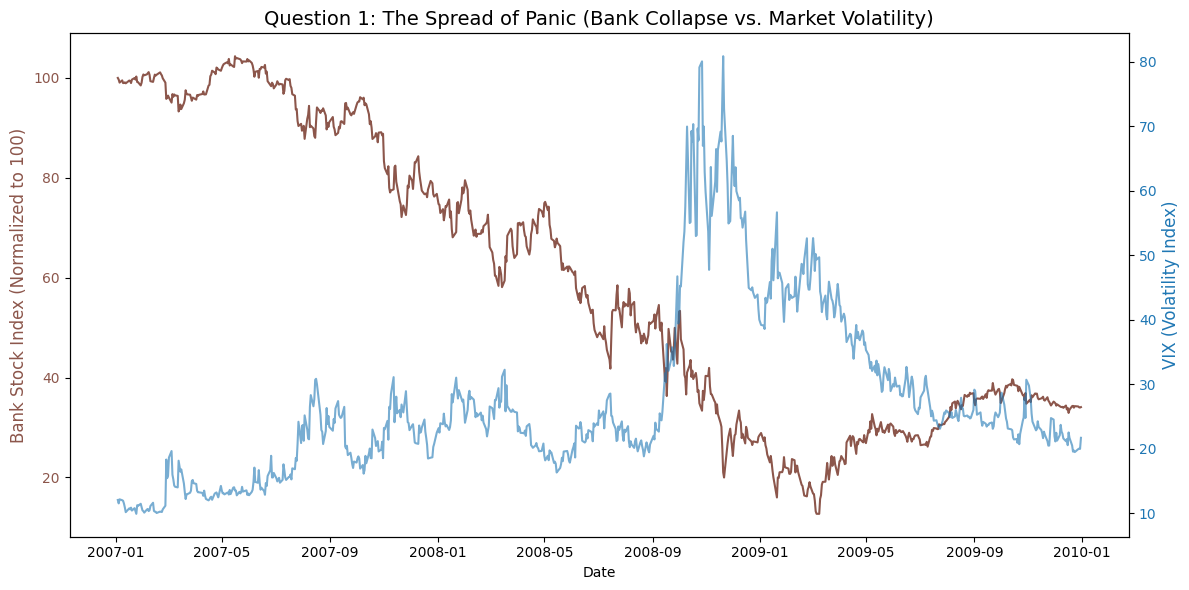

In [53]:
# Normalize to start of 2007
def norm(df):
    start_price = df.loc['2007-01-03', 'Close']
    df['Normalized'] = df['Close'] / start_price * 100
    return df['Normalized']

aig_norm = norm(data["AIG"])
c_norm = norm(data["C"])
jpm_norm = norm(data["JPM"])

# Average Bank Index
bank_index = (aig_norm + c_norm + jpm_norm) / 3

# 2. PREP VIX
vix = data["VIX"]

# 3. COMBINE
combined_fear = pd.DataFrame({'Banks': bank_index, 'VIX': vix['Close']}).dropna()
crisis_fear = combined_fear.loc['2007-01-01':'2009-12-31']

# 4. PLOT
fig, ax1 = plt.subplots(figsize=(12, 6))

color_bank = 'tab:brown'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bank Stock Index (Normalized to 100)', color=color_bank, fontsize=12)
ax1.plot(crisis_fear.index, crisis_fear['Banks'], color=color_bank, label='Major Banks (AIG, C, JPM)')
ax1.tick_params(axis='y', labelcolor=color_bank)

ax2 = ax1.twinx()
color_vix = 'tab:blue'
ax2.set_ylabel('VIX (Volatility Index)', color=color_vix, fontsize=12)
ax2.plot(crisis_fear.index, crisis_fear['VIX'], color=color_vix, alpha=0.6, label='VIX (Fear Index)')
ax2.tick_params(axis='y', labelcolor=color_vix)

plt.title('Question 1: The Spread of Panic (Bank Collapse vs. Market Volatility)', fontsize=14)
fig.tight_layout()

## corr plots (honestly can used for all 3)

Files generated: heatmap_2008_crisis_with_snp.png


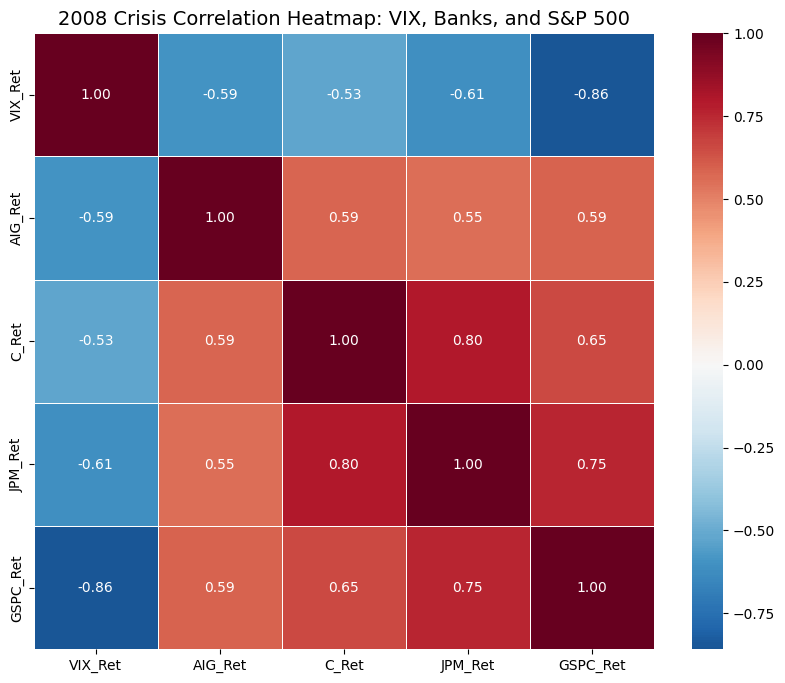

In [68]:
vix_ret  = data["VIX"]['Close'].pct_change().rename("VIX_Ret")
aig_ret  = data["AIG"]['Close'].pct_change().rename("AIG_Ret")
c_ret    = data["C"]['Close'].pct_change().rename("C_Ret")
jpm_ret  = data["JPM"]['Close'].pct_change().rename("JPM_Ret")
gspc_ret = data["GSPC"]['Close'].pct_change().rename("GSPC_Ret")

# Combine all into one dataframe
all_returns = pd.concat([vix_ret, aig_ret, c_ret, jpm_ret, gspc_ret], axis=1, join='inner')

# Filter for the year 2008 crisis period
returns_2008C = all_returns.loc['2008-09-01':'2008-12-31']

# --- PLOT 1: HEATMAP ---
plt.figure(figsize=(10, 8))
corr_matrix8 = returns_2008C.corr()
sns.heatmap(corr_matrix8, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)
plt.title('2008 Crisis Correlation Heatmap: VIX, Banks, and S&P 500', fontsize=14)
plt.savefig('heatmap_2008_with_snp.png')


print("Files generated: heatmap_2008_crisis_with_snp.png")

Files generated: heatmap_2007_with_snp.png


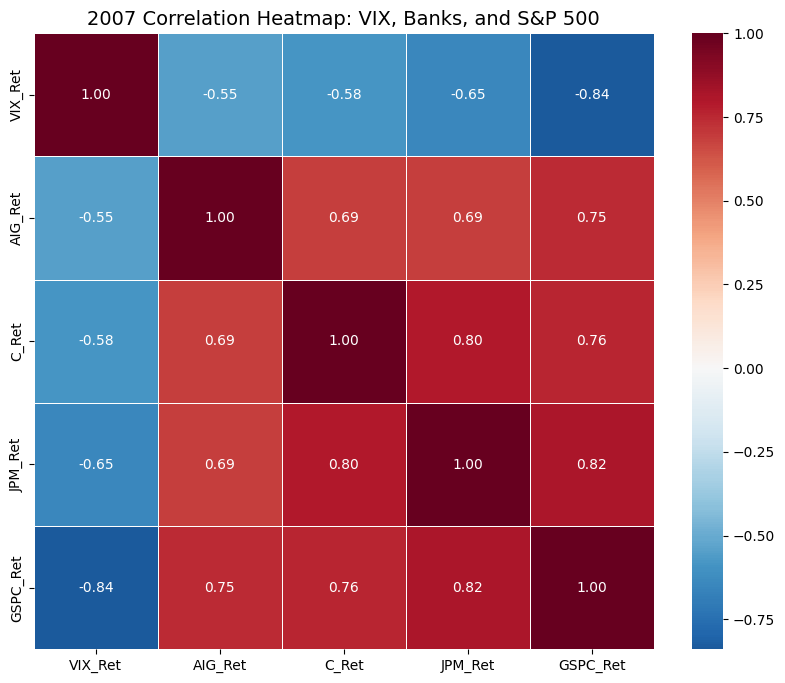

In [69]:

# Filter for the year 2007
returns_2007 = all_returns.loc['2007-01-01':'2007-12-31']

# --- PLOT 1: HEATMAP ---
plt.figure(figsize=(10, 8))
corr_matrix7 = returns_2007.corr()
sns.heatmap(corr_matrix7, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)
plt.title('2007 Correlation Heatmap: VIX, Banks, and S&P 500', fontsize=14)
plt.savefig('heatmap_2007_with_snp.png')



print("Files generated: heatmap_2007_with_snp.png")

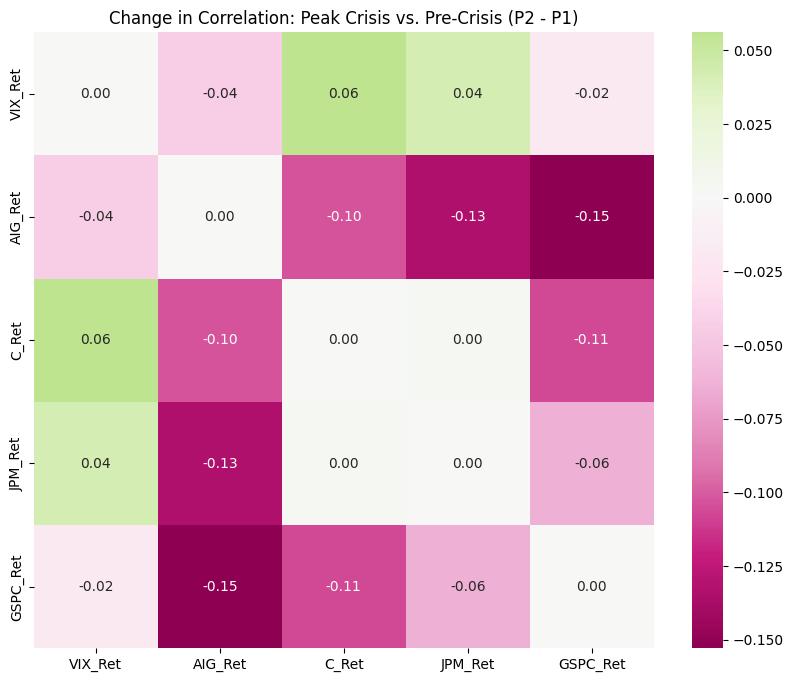

In [71]:
corr_diff = corr_matrix8 - corr_matrix7
plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, cmap='PiYG', center=0, fmt='.2f')
plt.title('Change in Correlation: Peak Crisis vs. Pre-Crisis (P2 - P1)')
plt.savefig('heatmap_corr_change.png')

Files generated: rolling_corr_2008_with_snp.png


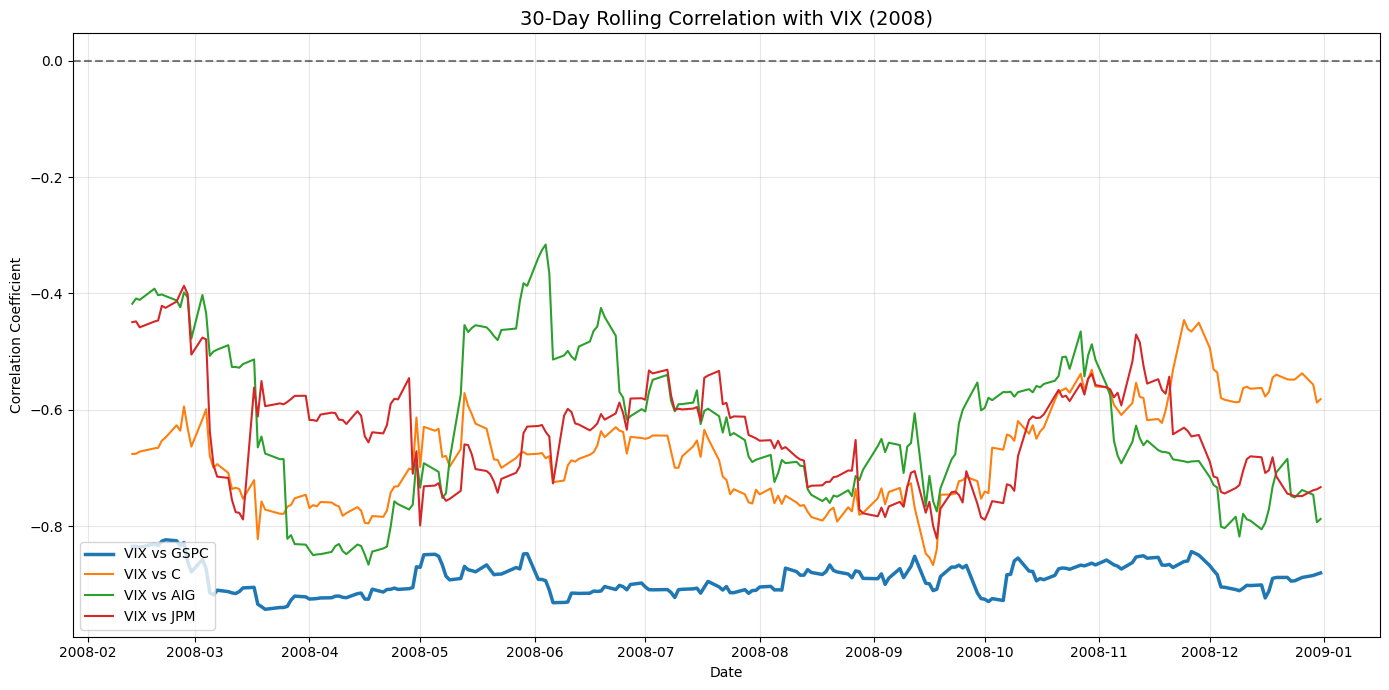

In [70]:

# Filter for the year 2008
returns_2008 = all_returns.loc['2008-01-01':'2008-12-31']


# --- PLOT 1: 30-DAY ROLLING CORRELATION ---
plt.figure(figsize=(14, 7))
window = 30

# Correlation of each asset with VIX
for ticker in ['GSPC', 'C', 'AIG', 'JPM']:
    roll_corr = returns_2008['VIX_Ret'].rolling(window=window).corr(returns_2008[f'{ticker}_Ret'])
    plt.plot(roll_corr, label=f'VIX vs {ticker}', linewidth=1.5 if ticker != 'GSPC' else 2.5)

plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title(f'{window}-Day Rolling Correlation with VIX (2008)', fontsize=14)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Date')
plt.legend(loc='lower left', frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('rolling_corr_2008_with_snp.png')

print("Files generated: rolling_corr_2008_with_snp.png")

## timeline (1a)

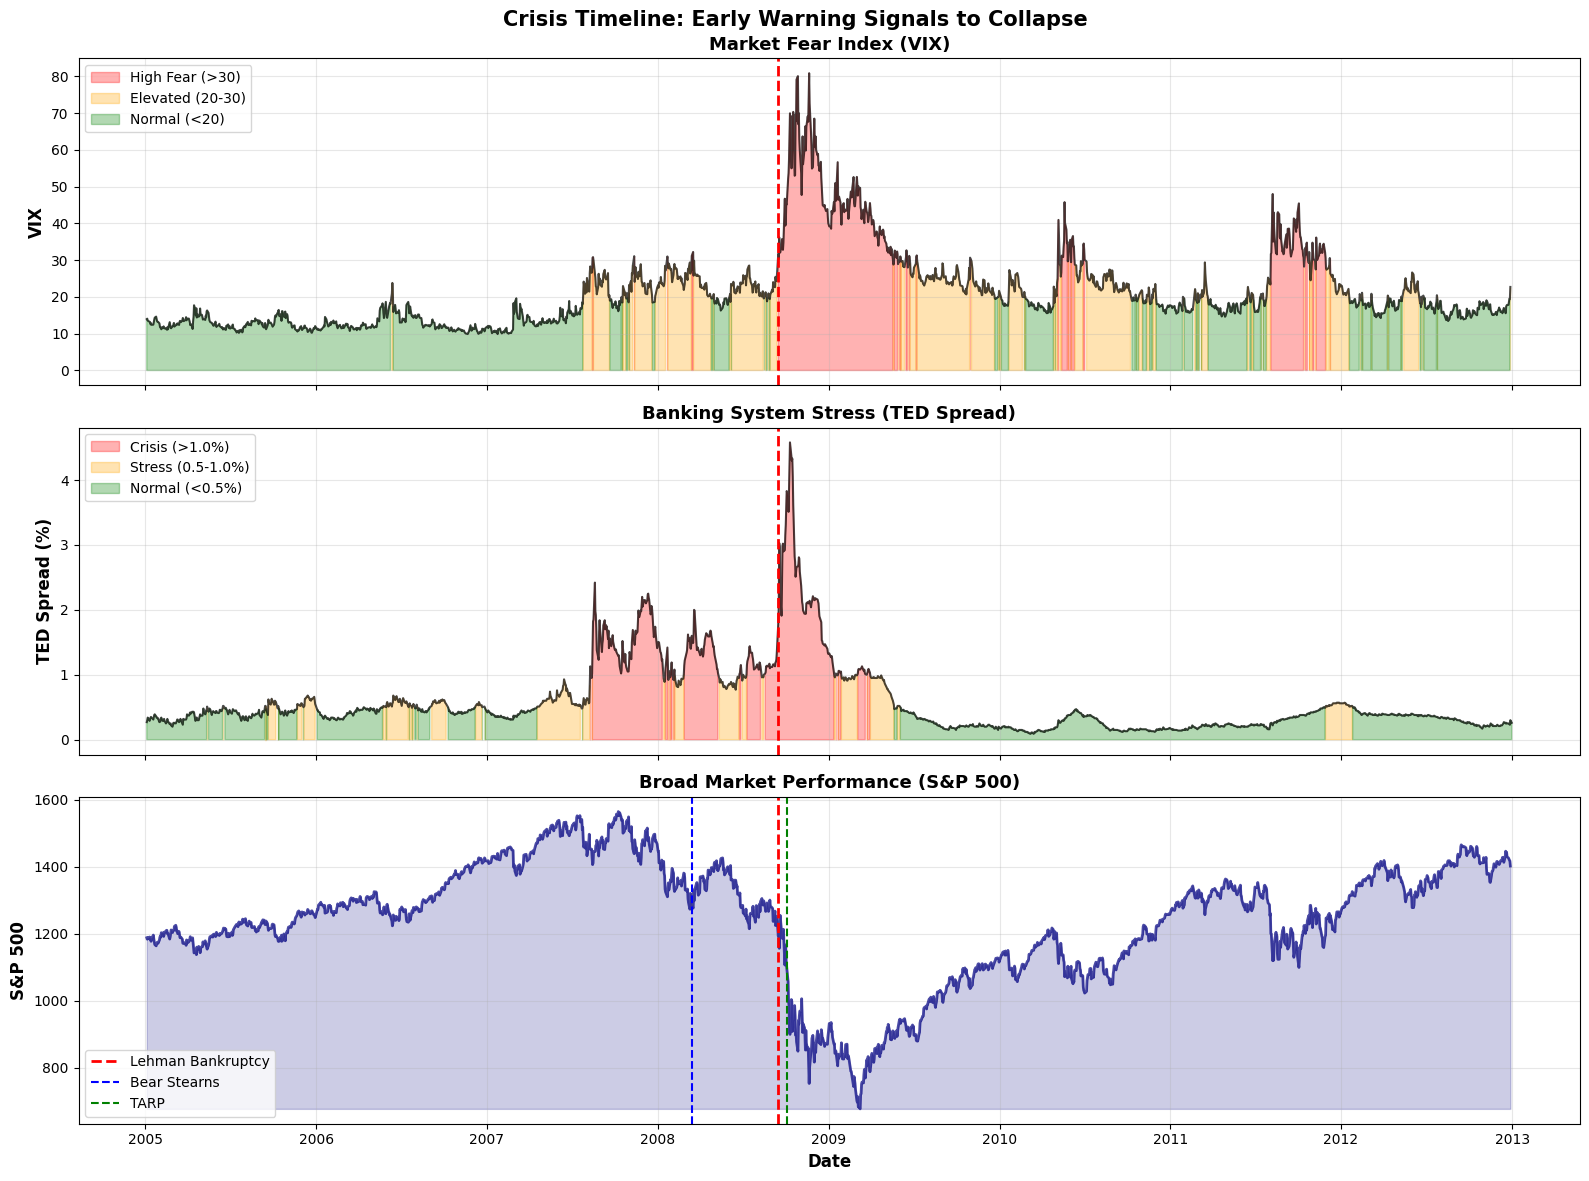

In [73]:
lehman_date = pd.to_datetime('2008-09-15')
reserve_primary_date = pd.to_datetime('2008-09-16')
bear_stearns_date = pd.to_datetime('2008-03-14')
tarp_date = pd.to_datetime('2008-10-03')
# Additional detailed plots
# Figure 2: Detailed Timeline
fig2, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# VIX with stress zones
ax = axes[0]
vix_data = data['VIX']['Close']
ax.fill_between(vix_data.index, 0, vix_data, where=(vix_data > 30), alpha=0.3, color='red', label='High Fear (>30)')
ax.fill_between(vix_data.index, 0, vix_data, where=(vix_data <= 30) & (vix_data > 20), alpha=0.3, color='orange', label='Elevated (20-30)')
ax.fill_between(vix_data.index, 0, vix_data, where=(vix_data <= 20), alpha=0.3, color='green', label='Normal (<20)')
ax.plot(vix_data.index, vix_data, color='black', linewidth=1.5, alpha=0.7)
ax.axvline(lehman_date, color='red', linestyle='--', linewidth=2)
ax.set_ylabel('VIX', fontsize=12, fontweight='bold')
ax.set_title('Market Fear Index (VIX)', fontsize=13, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# TED Spread
ax = axes[1]
ted_data = data['TEDRATE']['TEDRATE']
ax.fill_between(ted_data.index, 0, ted_data, where=(ted_data > 1.0), alpha=0.3, color='red', label='Crisis (>1.0%)')
ax.fill_between(ted_data.index, 0, ted_data, where=(ted_data <= 1.0) & (ted_data > 0.5), alpha=0.3, color='orange', label='Stress (0.5-1.0%)')
ax.fill_between(ted_data.index, 0, ted_data, where=(ted_data <= 0.5), alpha=0.3, color='green', label='Normal (<0.5%)')
ax.plot(ted_data.index, ted_data, color='black', linewidth=1.5, alpha=0.7)
ax.axvline(lehman_date, color='red', linestyle='--', linewidth=2)
ax.set_ylabel('TED Spread (%)', fontsize=12, fontweight='bold')
ax.set_title('Banking System Stress (TED Spread)', fontsize=13, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# S&P 500
ax = axes[2]
sp500_data = data['GSPC']['Close']
ax.plot(sp500_data.index, sp500_data, color='navy', linewidth=2, alpha=0.7)
ax.axvline(lehman_date, color='red', linestyle='--', linewidth=2, label='Lehman Bankruptcy')
ax.axvline(bear_stearns_date, color='blue', linestyle='--', linewidth=1.5, label='Bear Stearns')
ax.axvline(tarp_date, color='green', linestyle='--', linewidth=1.5, label='TARP')
ax.fill_between(sp500_data.index, sp500_data.min(), sp500_data, alpha=0.2, color='navy')
ax.set_ylabel('S&P 500', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_title('Broad Market Performance (S&P 500)', fontsize=13, fontweight='bold')
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)

plt.suptitle('Crisis Timeline: Early Warning Signals to Collapse', fontsize=15, fontweight='bold')
plt.tight_layout()

## individual bank stocks (1C)

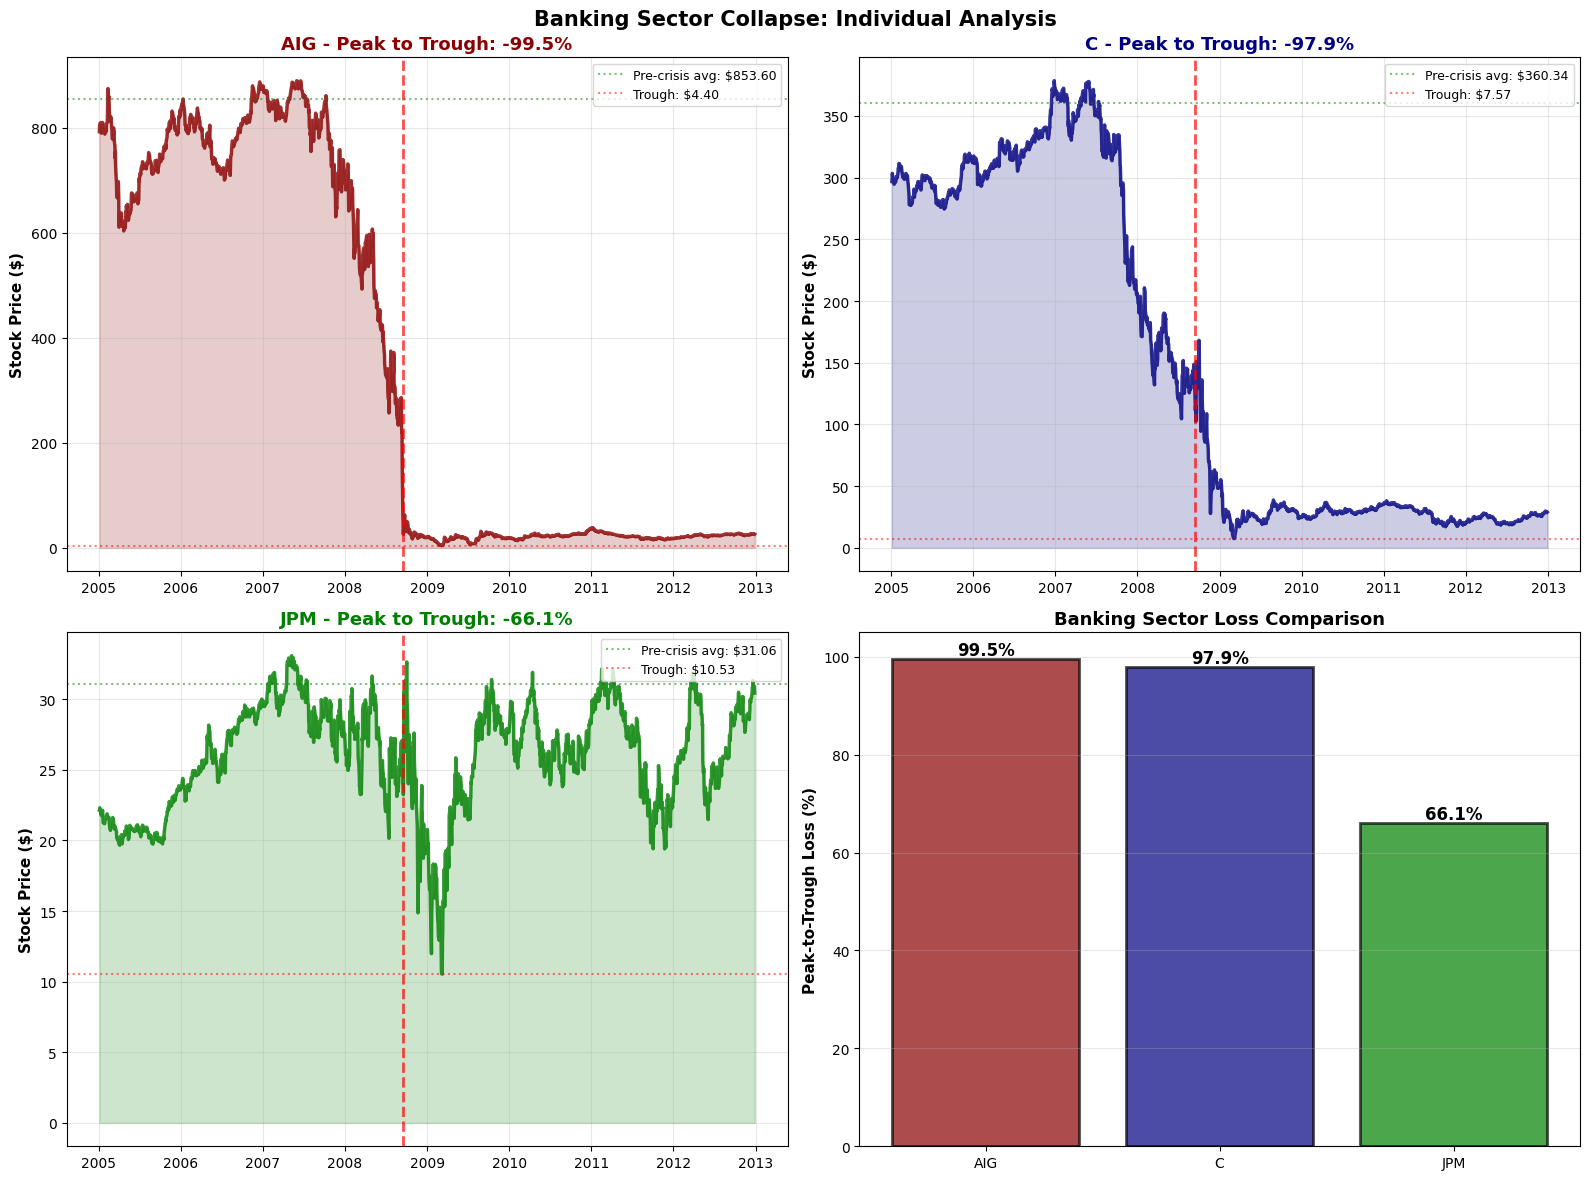

In [74]:
# Figure 3: Banking Sector Comparison
fig3, axes = plt.subplots(2, 2, figsize=(16, 12))

# Individual bank charts
banks = [('AIG', 'darkred'), ('C', 'navy'), ('JPM', 'green')]
for idx, (bank, color) in enumerate(banks):
    ax = axes[idx // 2, idx % 2]
    bank_data = data[bank]['Close']

    ax.plot(bank_data.index, bank_data, color=color, linewidth=2.5, alpha=0.8)
    ax.fill_between(bank_data.index, 0, bank_data, alpha=0.2, color=color)
    ax.axvline(lehman_date, color='red', linestyle='--', linewidth=2, alpha=0.7)

    # Mark pre-crisis avg and trough
    pre_crisis_avg = bank_data['2007-01':'2007-06'].mean()
    trough = bank_data.min()
    ax.axhline(pre_crisis_avg, color='green', linestyle=':', alpha=0.5, label=f'Pre-crisis avg: ${pre_crisis_avg:.2f}')
    ax.axhline(trough, color='red', linestyle=':', alpha=0.5, label=f'Trough: ${trough:.2f}')

    loss_pct = ((trough - pre_crisis_avg) / pre_crisis_avg) * 100

    ax.set_ylabel('Stock Price ($)', fontsize=11, fontweight='bold')
    ax.set_title(f'{bank} - Peak to Trough: {loss_pct:.1f}%', fontsize=13, fontweight='bold', color=color)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

# Summary comparison
ax = axes[1, 1]
summary_data = []
for bank, _ in banks:
    bank_prices = data[bank]['Close']
    pre_crisis_avg = bank_prices['2007-01':'2007-06'].mean()
    trough = bank_prices.min()
    loss_pct = ((trough - pre_crisis_avg) / pre_crisis_avg) * 100
    summary_data.append({'Bank': bank, 'Loss (%)': abs(loss_pct)})

summary_df = pd.DataFrame(summary_data)
bars = ax.bar(summary_df['Bank'], summary_df['Loss (%)'], color=['darkred', 'navy', 'green'], alpha=0.7, edgecolor='black', linewidth=2)

for bar, value in zip(bars, summary_df['Loss (%)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Peak-to-Trough Loss (%)', fontsize=11, fontweight='bold')
ax.set_title('Banking Sector Loss Comparison', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 105)

plt.suptitle('Banking Sector Collapse: Individual Analysis', fontsize=15, fontweight='bold')
plt.tight_layout()


## other graphs by claude lmk if yall want keep any

Creating visualizations...


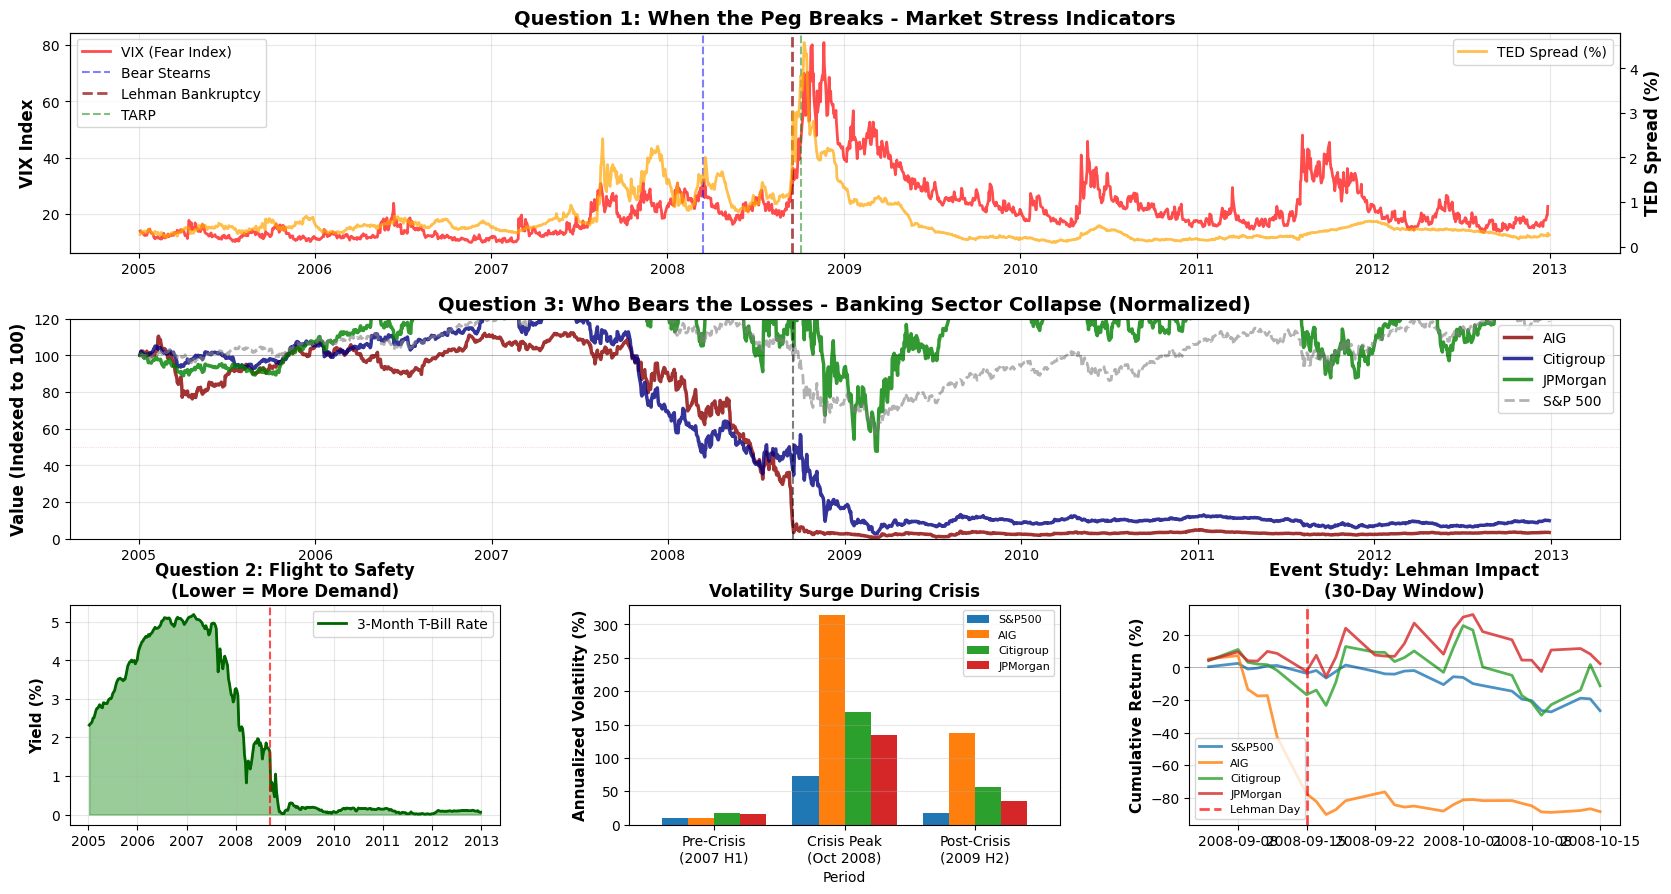

In [77]:
# Filter to crisis period
crisis_start = '2007-01-01'
crisis_end = '2009-12-31'

# Key dates
lehman_date = pd.to_datetime('2008-09-15')
reserve_primary_date = pd.to_datetime('2008-09-16')
bear_stearns_date = pd.to_datetime('2008-03-14')
tarp_date = pd.to_datetime('2008-10-03')

print("Creating visualizations...")

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. Market Stress Timeline
ax1 = fig.add_subplot(gs[0, :])
ax1_twin = ax1.twinx()

vix_data = data['VIX']['Close']
ted_data = data['TEDRATE']['TEDRATE']

ax1.plot(vix_data.index, vix_data, color='red', linewidth=2, label='VIX (Fear Index)', alpha=0.7)
ax1_twin.plot(ted_data.index, ted_data, color='orange', linewidth=2, label='TED Spread (%)', alpha=0.7)

# Mark key events
ax1.axvline(bear_stearns_date, color='blue', linestyle='--', alpha=0.5, label='Bear Stearns')
ax1.axvline(lehman_date, color='darkred', linestyle='--', alpha=0.7, linewidth=2, label='Lehman Bankruptcy')
ax1.axvline(tarp_date, color='green', linestyle='--', alpha=0.5, label='TARP')

ax1.set_ylabel('VIX Index', fontsize=12, fontweight='bold')
ax1_twin.set_ylabel('TED Spread (%)', fontsize=12, fontweight='bold')
ax1.set_title('Question 1: When the Peg Breaks - Market Stress Indicators', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# 2. Banking Sector Collapse
ax2 = fig.add_subplot(gs[1, :])

# Normalize to 100 at start
for bank, color, label in [('AIG', 'darkred', 'AIG'), ('C', 'navy', 'Citigroup'), ('JPM', 'green', 'JPMorgan')]:
    bank_data = data[bank]['Close']
    normalized = (bank_data / bank_data.iloc[0]) * 100
    ax2.plot(normalized.index, normalized, linewidth=2.5, label=label, color=color, alpha=0.8)

# Add S&P 500 for comparison
sp500_data = data['GSPC']['Close']
normalized_sp = (sp500_data / sp500_data.iloc[0]) * 100
ax2.plot(normalized_sp.index, normalized_sp, linewidth=2, label='S&P 500', color='gray', linestyle='--', alpha=0.6)

ax2.axvline(lehman_date, color='black', linestyle='--', alpha=0.5, linewidth=1.5)
ax2.axhline(100, color='black', linestyle='-', alpha=0.3, linewidth=0.5)
ax2.axhline(50, color='red', linestyle=':', alpha=0.3, linewidth=0.5)

ax2.set_ylabel('Value (Indexed to 100)', fontsize=12, fontweight='bold')
ax2.set_title('Question 3: Who Bears the Losses - Banking Sector Collapse (Normalized)', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 120)

# 3. Flight to Safety - Treasury Yields
ax3 = fig.add_subplot(gs[2, 0])
tbill_data = data['WGS3MO']['WGS3MO']
ax3.fill_between(tbill_data.index, tbill_data, alpha=0.4, color='green')
ax3.plot(tbill_data.index, tbill_data, linewidth=2, color='darkgreen', label='3-Month T-Bill Rate')
ax3.axvline(lehman_date, color='red', linestyle='--', alpha=0.7)
ax3.set_ylabel('Yield (%)', fontsize=11, fontweight='bold')
ax3.set_title('Question 2: Flight to Safety\n(Lower = More Demand)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Volatility Comparison
ax4 = fig.add_subplot(gs[2, 1])
combined_df = pd.DataFrame()
combined_df['S&P500'] = data['GSPC']['Close']
combined_df['AIG'] = data['AIG']['Close']
combined_df['Citigroup'] = data['C']['Close']
combined_df['JPMorgan'] = data['JPM']['Close']

returns_df = combined_df.pct_change().dropna()
volatility_df = returns_df.rolling(window=20).std() * np.sqrt(252) * 100

periods = {
    'Pre-Crisis\n(2007 H1)': ('2007-01', '2007-06'),
    'Crisis Peak\n(Oct 2008)': ('2008-10', '2008-10'),
    'Post-Crisis\n(2009 H2)': ('2009-07', '2009-12')
}

vol_data = []
for period, (start, end) in periods.items():
    vol_mean = volatility_df[start:end].mean()
    vol_data.append({
        'Period': period,
        'S&P500': vol_mean['S&P500'],
        'AIG': vol_mean['AIG'],
        'Citigroup': vol_mean['Citigroup'],
        'JPMorgan': vol_mean['JPMorgan']
    })

vol_df = pd.DataFrame(vol_data).set_index('Period')
vol_df.plot(kind='bar', ax=ax4, width=0.8)
ax4.set_ylabel('Annualized Volatility (%)', fontsize=11, fontweight='bold')
ax4.set_title('Volatility Surge During Crisis', fontsize=12, fontweight='bold')
ax4.legend(fontsize=8)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0, ha='center')
ax4.grid(True, alpha=0.3, axis='y')

# 5. Event Study - Lehman Impact
ax5 = fig.add_subplot(gs[2, 2])
event_start = lehman_date - pd.Timedelta(days=10)
event_end = lehman_date + pd.Timedelta(days=30)

event_returns = returns_df[event_start:event_end]
cumulative_returns = (1 + event_returns).cumprod() - 1

for col in cumulative_returns.columns:
    ax5.plot(cumulative_returns.index, cumulative_returns[col] * 100, linewidth=2, label=col, alpha=0.8)

ax5.axvline(lehman_date, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Lehman Day')
ax5.axhline(0, color='black', linestyle='-', alpha=0.3, linewidth=0.5)
ax5.set_ylabel('Cumulative Return (%)', fontsize=11, fontweight='bold')
ax5.set_title('Event Study: Lehman Impact\n(30-Day Window)', fontsize=12, fontweight='bold')
ax5.legend(fontsize=8, loc='lower left')
ax5.grid(True, alpha=0.3)




@inproceedings{chartalistNeurips2022,
  author    = {Kiarash Shamsi and Yulia R. Gel and  Murat Kantarcioglu and Cuneyt G. Akcora},
  title     = {Chartalist: Labeled Graph Datasets for UTXO and Account-based Blockchains},
  booktitle = {Advances in Neural Information Processing Systems 36: Annual Conference on Neural Information Processing Systems 2022, NeurIPS 2022, November 29-December 1, 2022, New Orleans, LA, USA},
  pages     = {1--14},
  year      = {2022},
  url       = {https://openreview.net/pdf?id=10iA3OowAV3}
  }